In [614]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re

In [615]:
def strip(dato):

    if type(dato) == str:
        dato = dato.strip()
        return dato
    else:
        return dato

PENETRACION DE INTERNET FIJO (POR CADA 100 HOGARES)

In [616]:
df_01 = pd.read_csv("Internet_Penetracion_Provincia.csv", sep=';', na_values = ['NA', 'N/A', 'NaN', 'Missing'], dtype=str)
df_01 = df_01.dropna(axis=1, how='all')
df_01 = df_01.dropna()
df_01 = df_01.drop_duplicates()
df_01 = df_01.map(strip)
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    object
 1   Trimestre                     864 non-null    object
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    object
dtypes: object(4)
memory usage: 27.1+ KB


In [617]:
df_01["Accesos por cada 100 hogares"] = pd.to_numeric(df_01["Accesos por cada 100 hogares"].str.replace(',', '.'), errors='coerce')#Convertir columna acceso por cada 100 hogares a numerico
df_01["Accesos por cada 100 hogares"] = df_01["Accesos por cada 100 hogares"].round(2)


In [618]:
df_01.head()

Año Trimestre        Provincia  Accesos por cada 100 hogares
0  2022         4     Buenos Aires                         78.94
1  2022         4  Capital Federal                        122.73
2  2022         4        Catamarca                         65.77
3  2022         4            Chaco                         43.62
4  2022         4           Chubut                         85.57

In [619]:
print(f"En Argentina {len(df_01['Provincia'].unique())} provincias poseen acceso a internet fijo entre los años {df_01['Año'].min()} y {df_01['Año'].max()}") #24 provincias

En Argentina 24 provincias poseen acceso a internet fijo entre los años 2014 y 2022


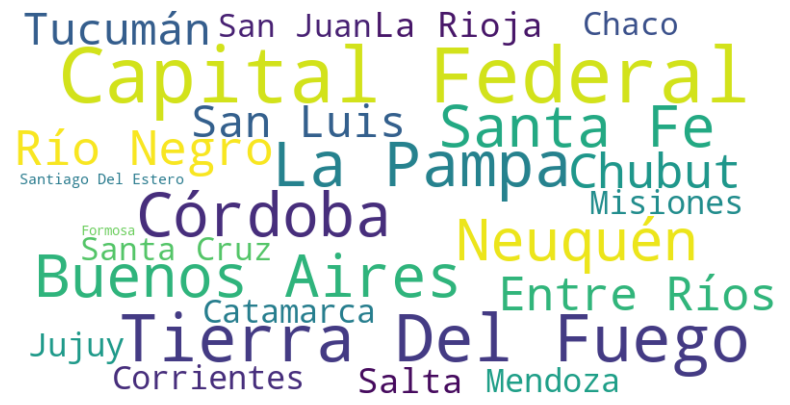

In [620]:
df_promedio = df_01.groupby("Provincia")["Accesos por cada 100 hogares"].mean().reset_index()

valores = dict(zip(df_promedio["Provincia"], df_promedio["Accesos por cada 100 hogares"]))

nube_palabras = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(valores)

plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.show()

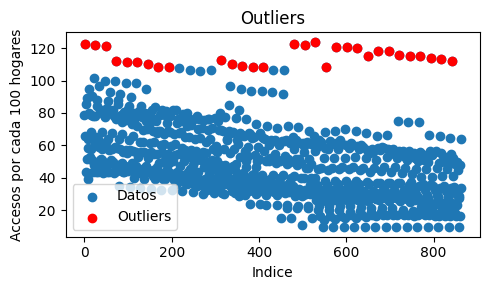

In [621]:
# Calcular quartiles
Q1 = df_01['Accesos por cada 100 hogares'].quantile(0.25)
Q3 = df_01['Accesos por cada 100 hogares'].quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral
umbral_outliers = 1.5 * IQR

# Marcar outliers en el gráfico de dispersión
outliers = df_01[(df_01['Accesos por cada 100 hogares'] < Q1 - umbral_outliers) | (df_01['Accesos por cada 100 hogares'] > Q3 + umbral_outliers)]

plt.figure(figsize=(5, 3))
plt.scatter(df_01.index, df_01['Accesos por cada 100 hogares'], label='Datos')
plt.scatter(outliers.index, outliers['Accesos por cada 100 hogares'], color='red', label='Outliers')

# Etiquetas y título
plt.xlabel('Indice')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Outliers')
plt.legend()

plt.tight_layout()
plt.show()


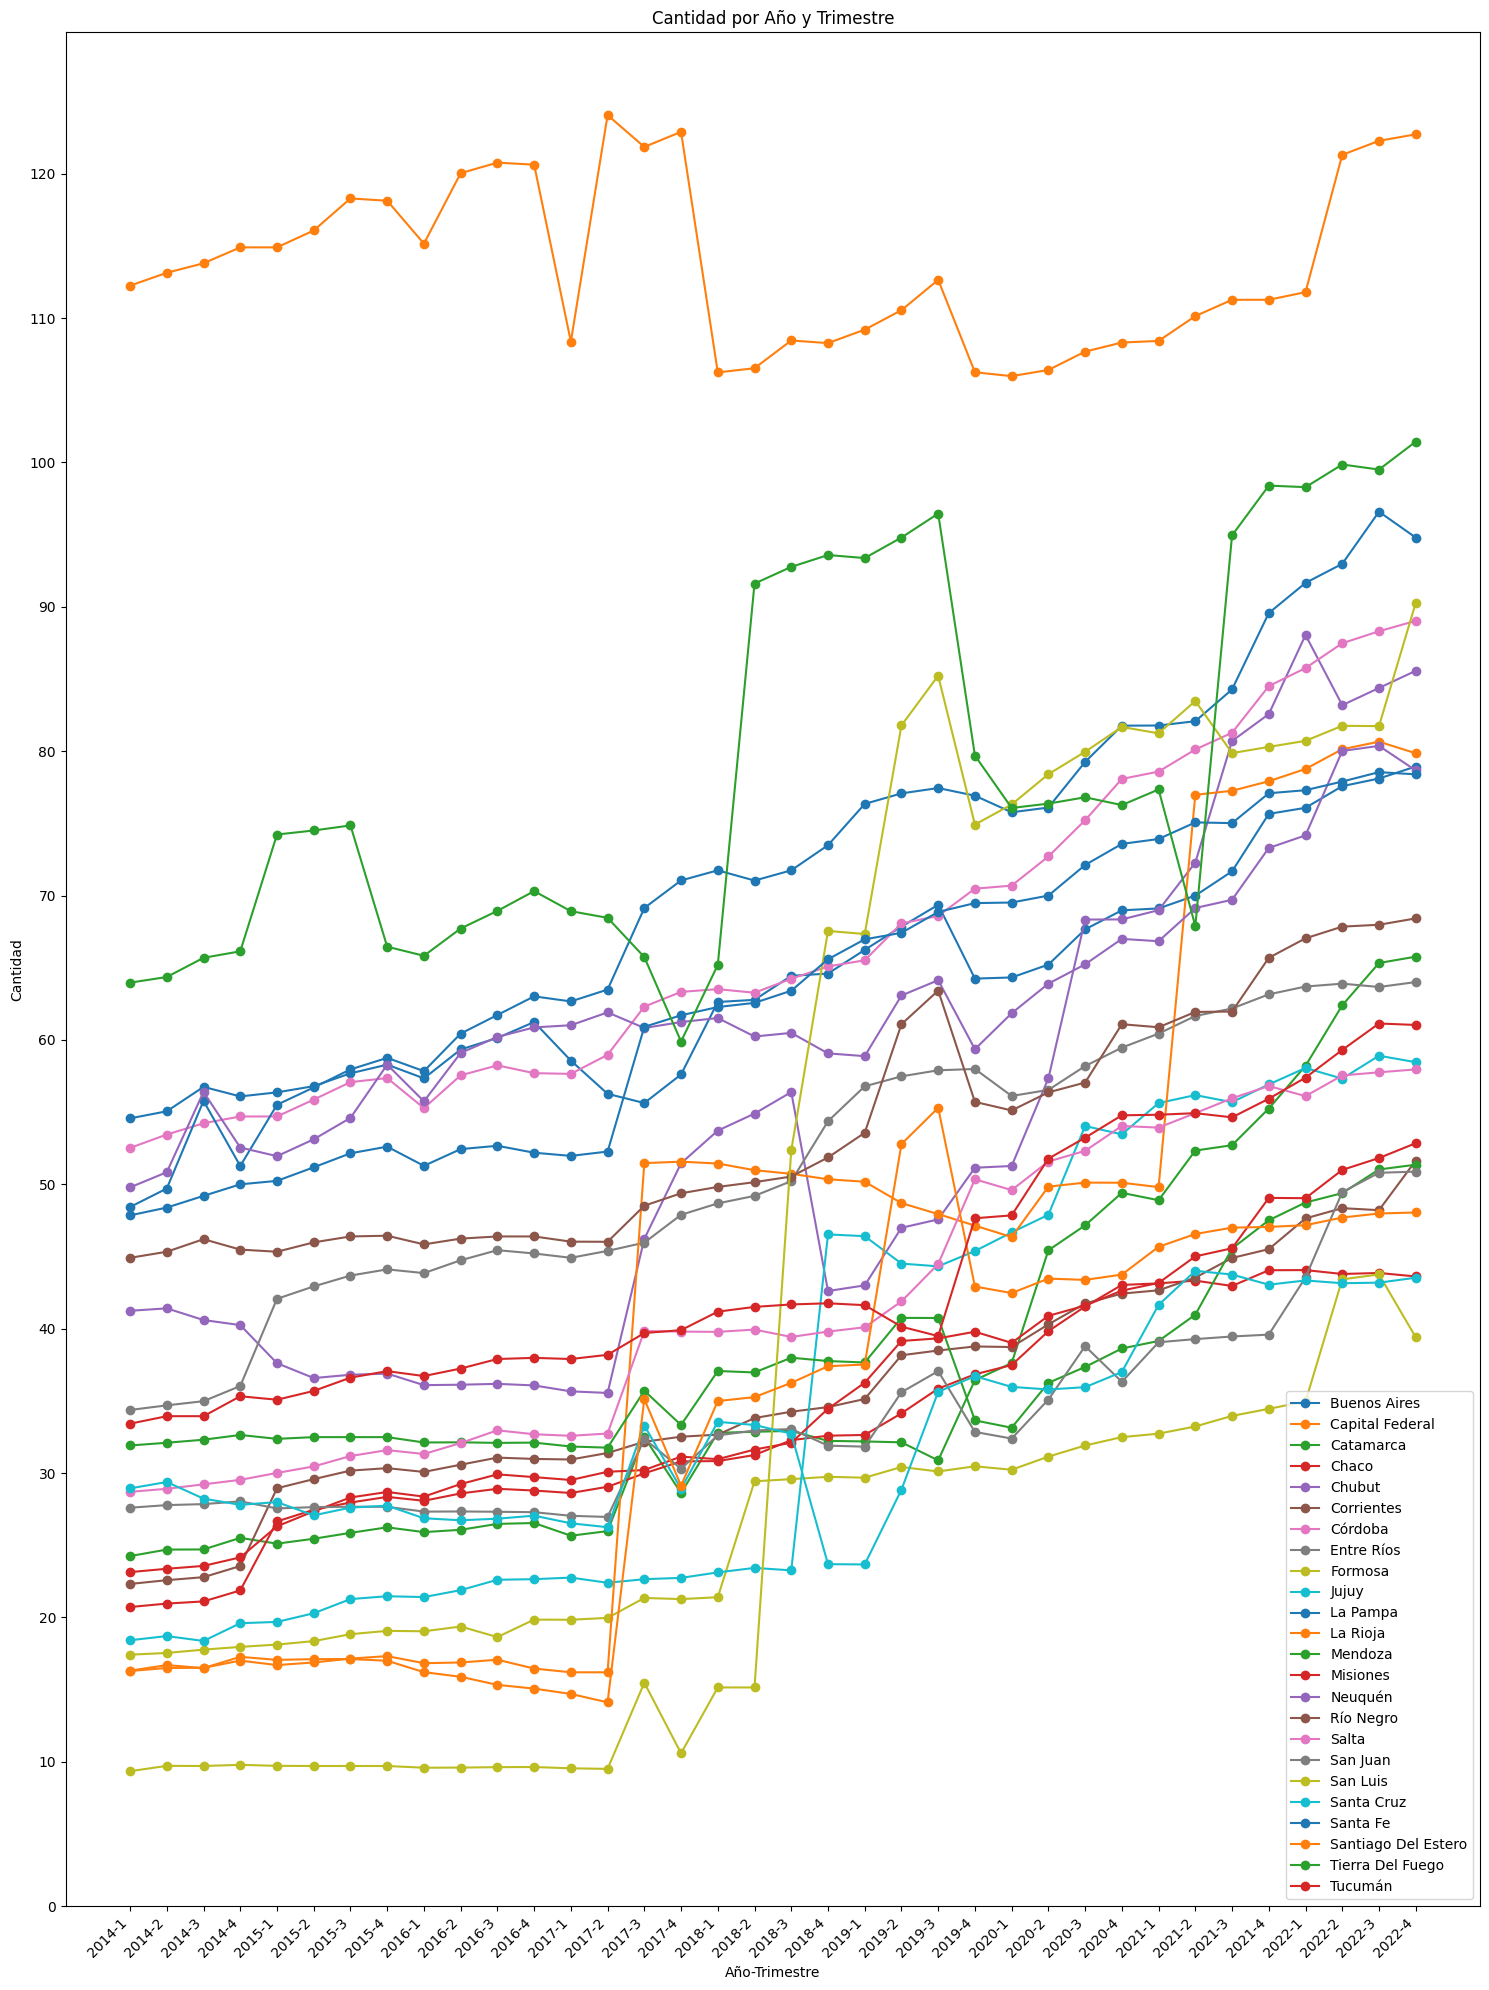

In [622]:
df_periodos = df_01.sort_values(by=["Provincia", "Año", "Trimestre"])

plt.figure(figsize=(15, 20))
for indice, provincia in df_periodos.groupby("Provincia"):
    etiqueta = f'{indice}'
    plt.plot(provincia['Año'].astype(str) + '-' + provincia['Trimestre'].astype(str), provincia["Accesos por cada 100 hogares"], marker='o', linestyle='-', label= etiqueta)

# Etiquetas y leyenda
plt.xlabel('Año-Trimestre')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Cantidad')
plt.title('Cantidad por Año y Trimestre')
plt.yticks(range(0, 125, 10))
plt.legend()
plt.tight_layout()
plt.show()

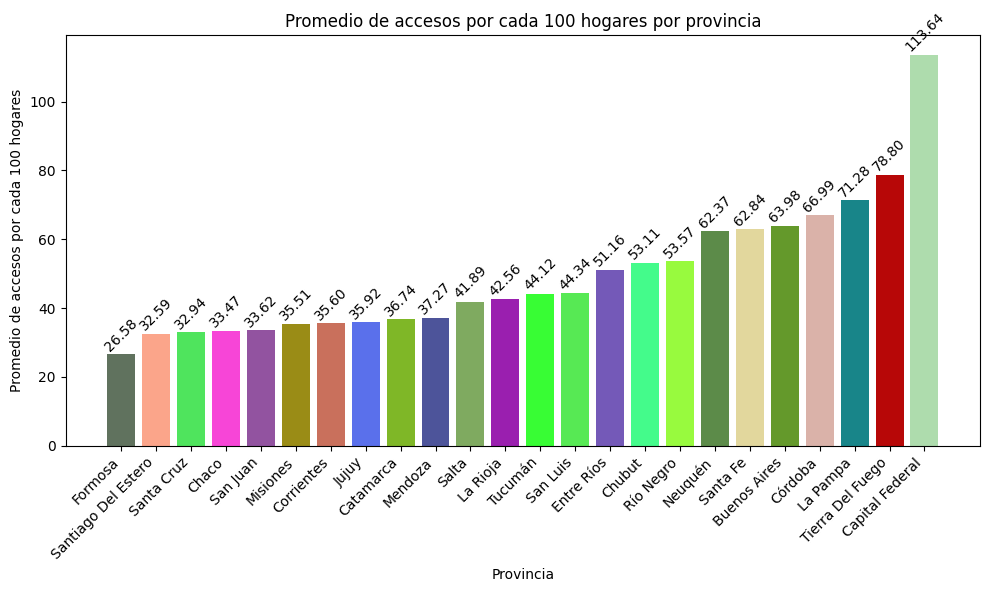

In [623]:

promedio = df_01.groupby("Provincia")["Accesos por cada 100 hogares"].mean().reset_index()
promedio = promedio.sort_values(by="Accesos por cada 100 hogares")

plt.figure(figsize=(10, 6))

colores = []
for _ in range(len(promedio['Provincia'])):
    color = (random.random(), random.random(), random.random())
    colores.append(color)

plt.bar(promedio['Provincia'], promedio['Accesos por cada 100 hogares'], color=colores)


plt.xlabel('Provincia')
plt.ylabel('Promedio de accesos por cada 100 hogares')
plt.title('Promedio de accesos por cada 100 hogares por provincia')


plt.xticks(promedio['Provincia'],rotation=45, ha="right")

# Mostrar el valor de cada barra
for i, valor in enumerate(promedio['Accesos por cada 100 hogares']):
    plt.text(i, valor + 1, f"{valor:.2f}", rotation=45, ha='center')

plt.tight_layout()
plt.show()


PENETRACION POR HOGARES NACIONAL DE INTERNET FIJO

In [624]:
df_02 = pd.read_csv("Internet_Penetracion_Total.csv", sep=';', na_values = ['NA', 'N/A', 'NaN', 'Missing'], dtype=str)
df_02 = df_02.dropna(axis=1, how='all')
df_02 = df_02.dropna()
df_02 = df_02.drop_duplicates()
df_02 = df_02.map(strip)
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           36 non-null     object
 1   Trimestre                     36 non-null     object
 2   Accesos por cada 100 hogares  36 non-null     object
 3   Accesos por cada 100 hab      36 non-null     object
 4   Periodo                       36 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


In [625]:
df_02["Accesos por cada 100 hogares"] = pd.to_numeric(df_02["Accesos por cada 100 hogares"].str.replace(',', '.'), errors='coerce')#Convertir columna acceso por cada 100 hogares a numerico
df_02["Accesos por cada 100 hogares"] = df_02["Accesos por cada 100 hogares"].round(2)
df_02["Accesos por cada 100 hab"] = pd.to_numeric(df_02["Accesos por cada 100 hab"].str.replace(',', '.'), errors='coerce')#Convertir columna acceso por cada 100 habitantes a numerico
df_02["Accesos por cada 100 hab"] = df_02["Accesos por cada 100 hab"].round(2)
df_02.head()

Año Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2022         4                         77.21                     24.15   
1  2022         3                         76.64                     23.95   
2  2022         2                         75.97                     23.72   
3  2022         1                         73.88                     23.05   
4  2021         4                         73.18                     22.81   

         Periodo  
0   Oct-Dic 2022  
1  Jul-Sept 2022  
2   Abr-Jun 2022  
3   Ene-Mar 2022  
4   Oct-Dic 2021

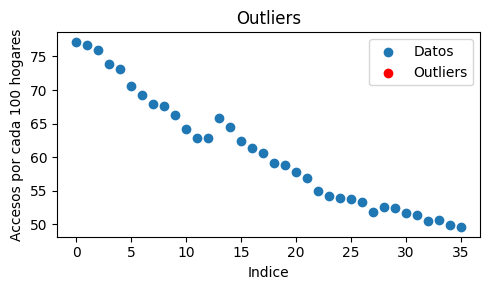

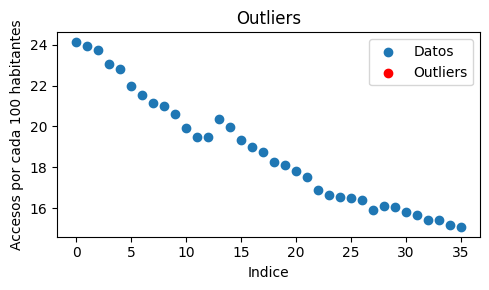

In [626]:
# Calcular quartiles
Q1 = df_02['Accesos por cada 100 hogares'].quantile(0.25)
Q3 = df_02['Accesos por cada 100 hogares'].quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral
umbral_outliers = 1.5 * IQR

# Marcar outliers en el gráfico de dispersión
outliers = df_02[(df_02['Accesos por cada 100 hogares'] < Q1 - umbral_outliers) | (df_02['Accesos por cada 100 hogares'] > Q3 + umbral_outliers)]

plt.figure(figsize=(5, 3))
plt.scatter(df_02.index, df_02['Accesos por cada 100 hogares'], label='Datos')
plt.scatter(outliers.index, outliers['Accesos por cada 100 hogares'], color='red', label='Outliers')

# Etiquetas y título
plt.xlabel('Indice')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Outliers')
plt.legend()

plt.tight_layout()
plt.show()

# Calcular quartiles
Q1 = df_02['Accesos por cada 100 hab'].quantile(0.25)
Q3 = df_02['Accesos por cada 100 hab'].quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral
umbral_outliers = 1.5 * IQR

# Marcar outliers en el gráfico de dispersión
outliers = df_02[(df_02['Accesos por cada 100 hab'] < Q1 - umbral_outliers) | (df_02['Accesos por cada 100 hab'] > Q3 + umbral_outliers)]

plt.figure(figsize=(5, 3))
plt.scatter(df_02.index, df_02['Accesos por cada 100 hab'], label='Datos')
plt.scatter(outliers.index, outliers['Accesos por cada 100 hab'], color='red', label='Outliers')

# Etiquetas y título
plt.xlabel('Indice')
plt.ylabel('Accesos por cada 100 habitantes')
plt.title('Outliers')
plt.legend()

plt.tight_layout()
plt.show()


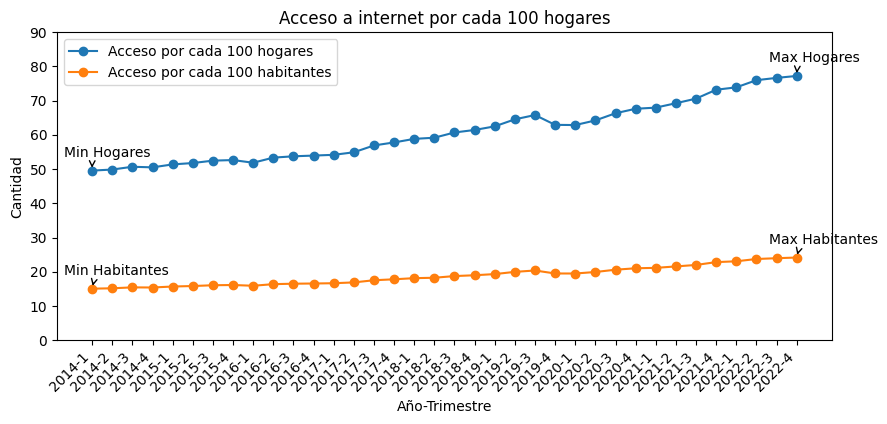

In [627]:
df_02 = df_02.sort_values(by=["Año", "Trimestre"])

plt.figure(figsize=(10, 4))

plt.plot(df_02['Año'].astype(str) + '-' + df_02['Trimestre'].astype(str), df_02["Accesos por cada 100 hogares"], marker='o', linestyle='-', label= "Acceso por cada 100 hogares")
plt.plot(df_02['Año'].astype(str) + '-' + df_02['Trimestre'].astype(str), df_02["Accesos por cada 100 hab"], marker='o', linestyle='-', label= "Acceso por cada 100 habitantes")

# Encontrar índices de valores máximos y mínimos
max_hogares_idx = df_02["Accesos por cada 100 hogares"].idxmax()
min_hogares_idx = df_02["Accesos por cada 100 hogares"].idxmin()

max_hab_idx = df_02["Accesos por cada 100 hab"].idxmax()
min_hab_idx = df_02["Accesos por cada 100 hab"].idxmin()

# Marcar los valores máximos y mínimos
plt.annotate('Max Hogares', xy=(df_02['Año'][max_hogares_idx] + '-' + df_02['Trimestre'][max_hogares_idx], df_02["Accesos por cada 100 hogares"][max_hogares_idx]), xytext=(-20, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.5'))
plt.annotate('Min Hogares', xy=(df_02['Año'][min_hogares_idx] + '-' + df_02['Trimestre'][min_hogares_idx], df_02["Accesos por cada 100 hogares"][min_hogares_idx]), xytext=(-20, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.5'))

plt.annotate('Max Habitantes', xy=(df_02['Año'][max_hab_idx] + '-' + df_02['Trimestre'][max_hab_idx], df_02["Accesos por cada 100 hab"][max_hab_idx]), xytext=(-20, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.5'))
plt.annotate('Min Habitantes', xy=(df_02['Año'][min_hab_idx] + '-' + df_02['Trimestre'][min_hab_idx], df_02["Accesos por cada 100 hab"][min_hab_idx]), xytext=(-20, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.5'))

# Etiquetas y leyenda
plt.xlabel('Año-Trimestre')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Cantidad')
plt.title('Acceso a internet por cada 100 hogares')
plt.yticks(range(0, 100, 10))
plt.legend()
plt.show()

TOTAL NACIONAL DE ACCESOS A INTERNET FIJO POR BANDA ANCHA Y BANDA ANGOSTA

In [628]:
df_03 = pd.read_csv("Internet_BAF_total.csv", sep=';', na_values = ['NA', 'N/A', 'NaN', 'Missing'], dtype=str)
df_03 = df_03.dropna(axis=1, how='all')
df_03 = df_03.dropna()
df_03 = df_03.drop_duplicates()
df_03 = df_03.map(strip)
df_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     object
 1   Trimestre         36 non-null     object
 2   Banda ancha fija  36 non-null     object
 3   Dial up           36 non-null     object
 4   Total             36 non-null     object
 5   Periodo           36 non-null     object
dtypes: object(6)
memory usage: 1.8+ KB


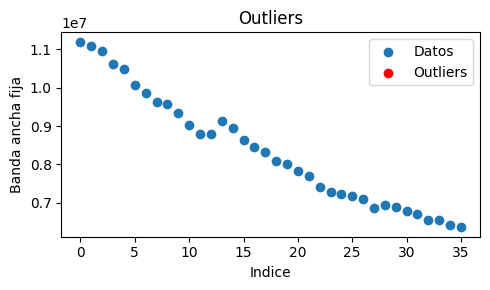

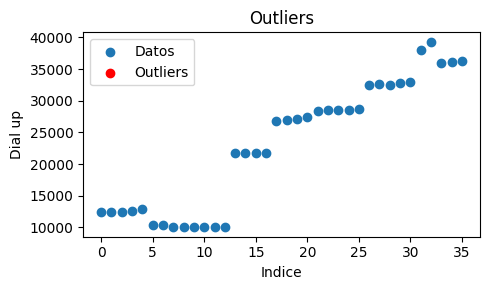

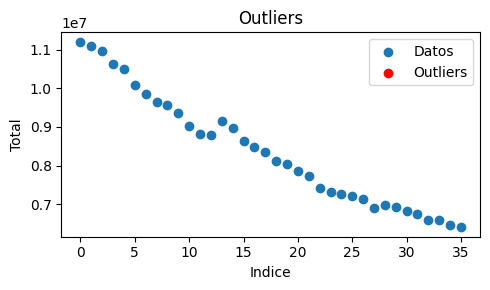

In [629]:
df_03['Banda ancha fija'] = pd.to_numeric(df_03['Banda ancha fija'].str.replace('.',''))
df_03['Dial up'] = pd.to_numeric(df_03['Dial up'].str.replace('.',''))
df_03['Total'] = pd.to_numeric(df_03['Total'].str.replace('.',''))
# Calcular quartiles
Q1 = df_03["Banda ancha fija"].quantile(0.25)
Q3 = df_03["Banda ancha fija"].quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral
umbral_outliers = 1.5 * IQR

# Marcar outliers en el gráfico de dispersión
outliers = df_03[(df_03["Banda ancha fija"] < Q1 - umbral_outliers) | (df_03["Banda ancha fija"] > Q3 + umbral_outliers)]

plt.figure(figsize=(5, 3))
plt.scatter(df_03.index, df_03["Banda ancha fija"], label='Datos')
plt.scatter(outliers.index, outliers['Banda ancha fija'], color='red', label='Outliers')

# Etiquetas y título
plt.xlabel('Indice')
plt.ylabel('Banda ancha fija')
plt.title('Outliers')
plt.legend()

plt.tight_layout()
plt.show()


# Calcular quartiles
Q1 = df_03["Dial up"].quantile(0.25)
Q3 = df_03["Dial up"].quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral
umbral_outliers = 1.5 * IQR

# Marcar outliers en el gráfico de dispersión
outliers = df_03[(df_03["Dial up"] < Q1 - umbral_outliers) | (df_03["Dial up"] > Q3 + umbral_outliers)]

plt.figure(figsize=(5, 3))
plt.scatter(df_03.index, df_03["Dial up"], label='Datos')
plt.scatter(outliers.index, outliers["Dial up"], color='red', label='Outliers')

# Etiquetas y título
plt.xlabel('Indice')
plt.ylabel("Dial up")
plt.title('Outliers')
plt.legend()

plt.tight_layout()
plt.show()


# Calcular quartiles
Q1 = df_03["Total"].quantile(0.25)
Q3 = df_03["Total"].quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral
umbral_outliers = 1.5 * IQR

# Marcar outliers en el gráfico de dispersión
outliers = df_03[(df_03["Total"] < Q1 - umbral_outliers) | (df_03["Total"] > Q3 + umbral_outliers)]

plt.figure(figsize=(5, 3))
plt.scatter(df_03.index, df_03["Total"], label='Datos')
plt.scatter(outliers.index, outliers["Total"], color='red', label='Outliers')

# Etiquetas y título
plt.xlabel('Indice')
plt.ylabel("Total")
plt.title('Outliers')
plt.legend()

plt.tight_layout()
plt.show()

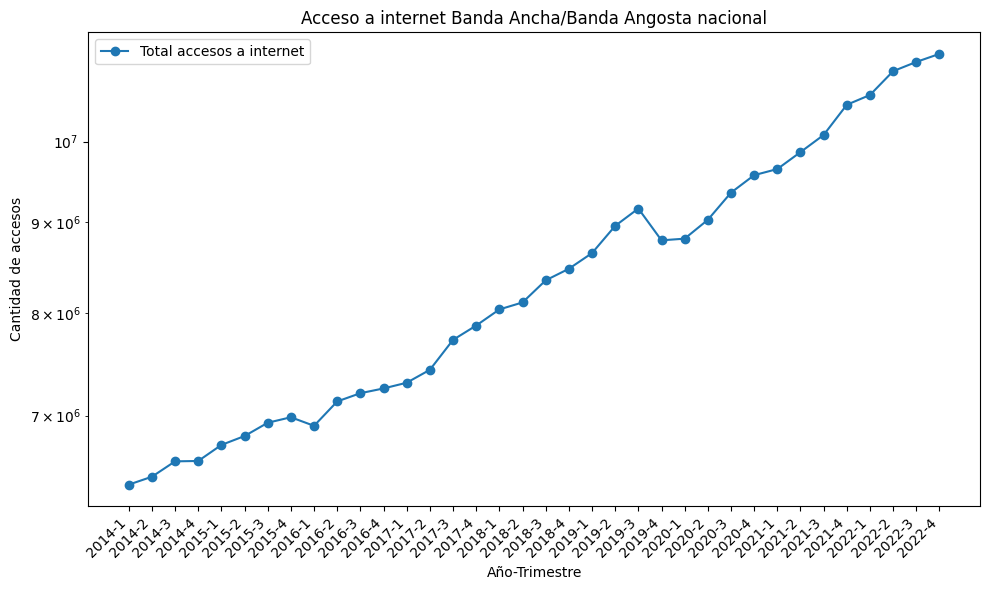

In [630]:
df_03 = df_03.sort_values(by=["Año", "Trimestre"])

plt.figure(figsize=(10, 6))
plt.yscale('log')

plt.plot(df_03['Año'].astype(str) + '-' + df_03['Trimestre'].astype(str), df_03["Total"], marker='o', linestyle='-', label= "Total accesos a internet")

# Etiquetas y leyenda
plt.xlabel('Año-Trimestre')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Cantidad de accesos')
plt.title('Acceso a internet Banda Ancha/Banda Angosta nacional')
plt.legend()
plt.tight_layout()
plt.show()

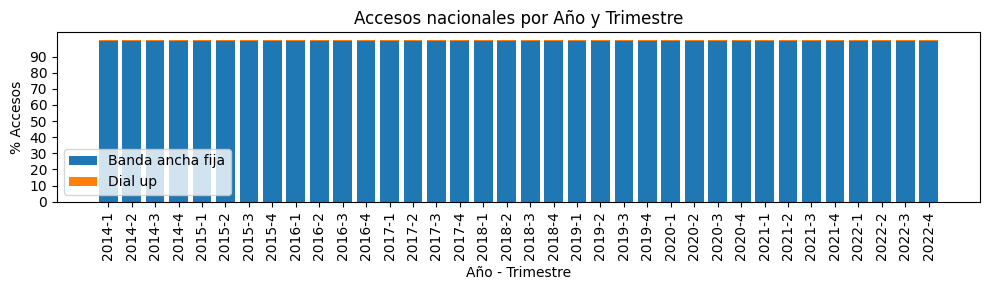

In [631]:

plt.figure(figsize=(10, 3))

plt.bar(df_03['Año'].astype(str) + '-' + df_03['Trimestre'].astype(str), (df_03["Banda ancha fija"]/df_03["Total"])*100, label='Banda ancha fija')
plt.bar(df_03['Año'].astype(str) + '-' + df_03['Trimestre'].astype(str), (df_03['Dial up']/df_03["Total"])*100, bottom=(df_03["Banda ancha fija"]/df_03["Total"])*100, label='Dial up')

plt.xlabel('Año - Trimestre')
plt.ylabel('% Accesos')
plt.title(f'Accesos nacionales por Año y Trimestre')
plt.yticks(range(0, 100, 10))
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

ACCESOS A BANDA ANCHA Y BANDA ANGOSTA POR PROVINCIA

In [632]:
df_04 = pd.read_csv("Internet_BAF_provincias.csv", sep=';', na_values = ['NA', 'N/A', 'NaN', 'Missing'], dtype=str)
df_04 = df_04.dropna(axis=1, how='all')
df_04 = df_04.dropna()
df_04 = df_04.drop_duplicates()
df_04 = df_04.map(strip)
df_04.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               862 non-null    object
 1   Trimestre         862 non-null    object
 2   Provincia         862 non-null    object
 3   Banda ancha fija  862 non-null    object
 4   Dial up           862 non-null    object
 5   Total             862 non-null    object
dtypes: object(6)
memory usage: 47.1+ KB


In [633]:
palabra = r'\bCórdob\b'
df_04['Provincia'] = df_04['Provincia'].str.replace(palabra, 'Córdoba', regex=True)
palabra = r'\bEntre Río\b'
df_04['Provincia'] = df_04['Provincia'].str.replace(palabra, 'Entre Ríos', regex=True)
palabra = r'\bNeuqué\b'
df_04['Provincia'] = df_04['Provincia'].str.replace(palabra, 'Neuquén', regex=True)
palabra = r'\bRío Negr\b'
df_04['Provincia'] = df_04['Provincia'].str.replace(palabra, 'Río Negro', regex=True)
palabra = r'\bTucumá\b'
df_04['Provincia'] = df_04['Provincia'].str.replace(palabra, 'Tucumán', regex=True)

print(len(df_04['Provincia'].unique()))
df_04['Provincia'].unique()

24


array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [634]:
df_04['Banda ancha fija'] = pd.to_numeric(df_04['Banda ancha fija'].str.replace('.',''))
df_04['Dial up'] = pd.to_numeric(df_04['Dial up'].str.replace('.',''))
df_04['Total'] = pd.to_numeric(df_04['Total'].str.replace('.',''))

df_04.head()

Año Trimestre        Provincia  Banda ancha fija  Dial up    Total
0  2022         4     Buenos Aires           4788466     6199  4794665
1  2022         4  Capital Federal           1549781     2145  1551926
2  2022         4        Catamarca             70908        1    70909
3  2022         4            Chaco            143658        5   143663
4  2022         4           Chubut            167855      904   168759

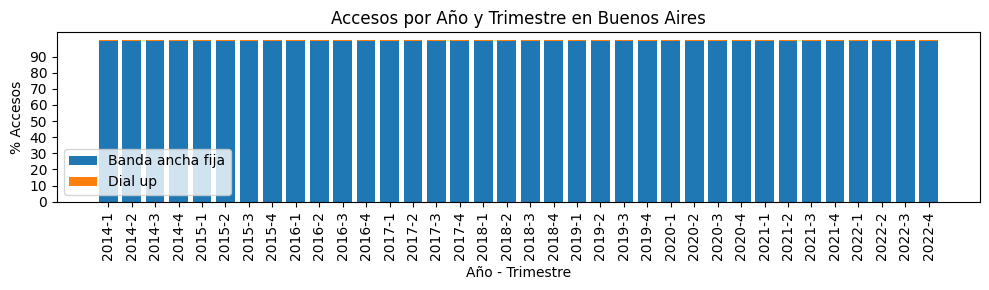

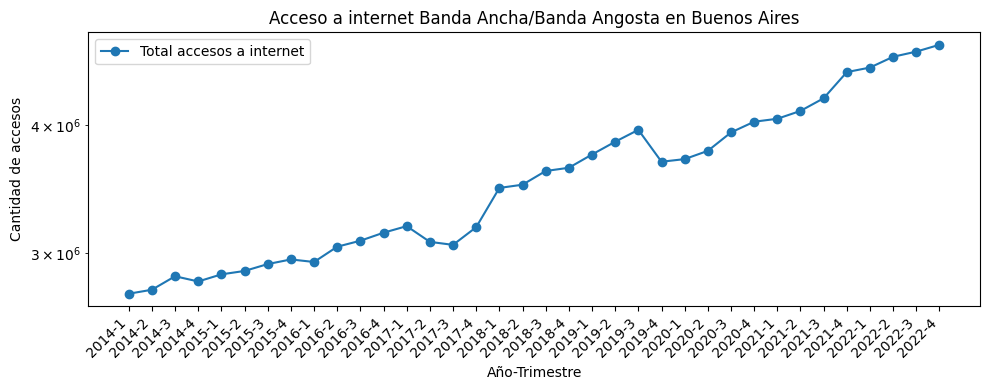

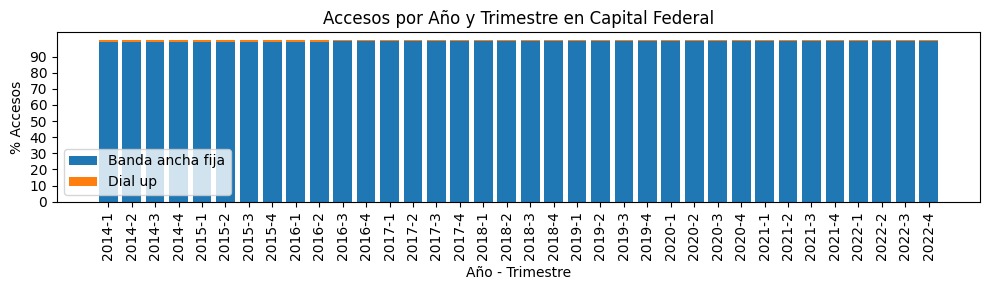

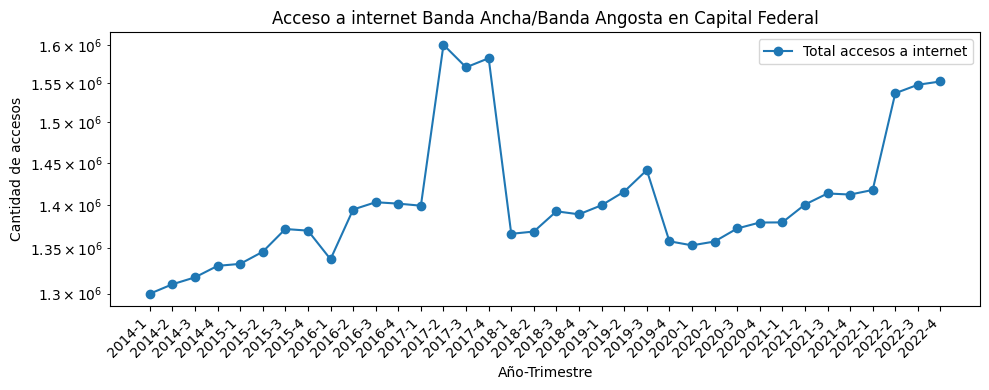

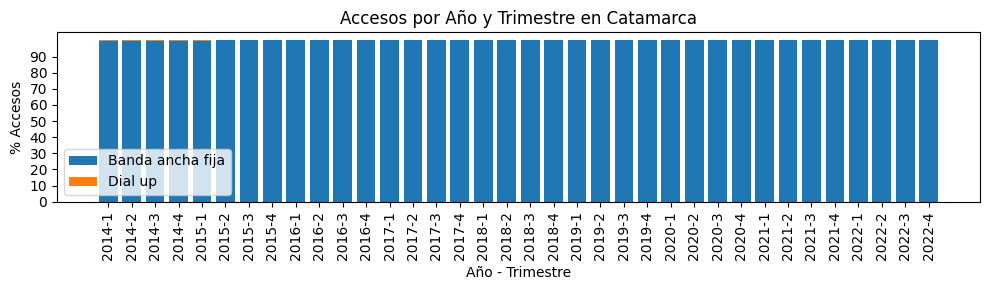

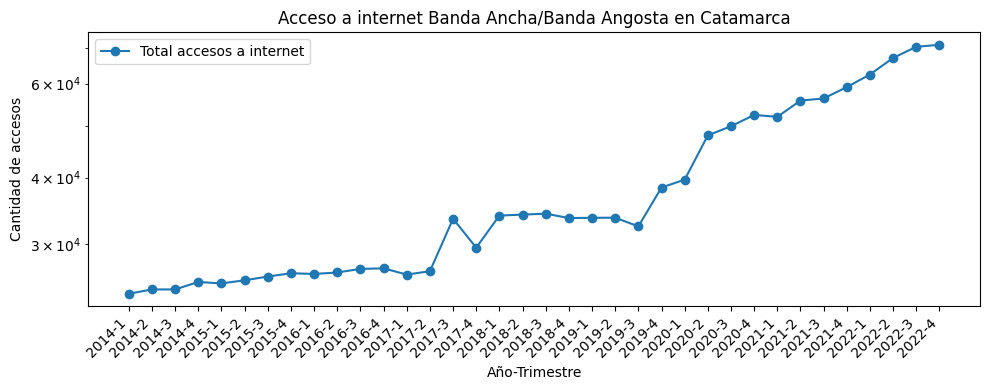

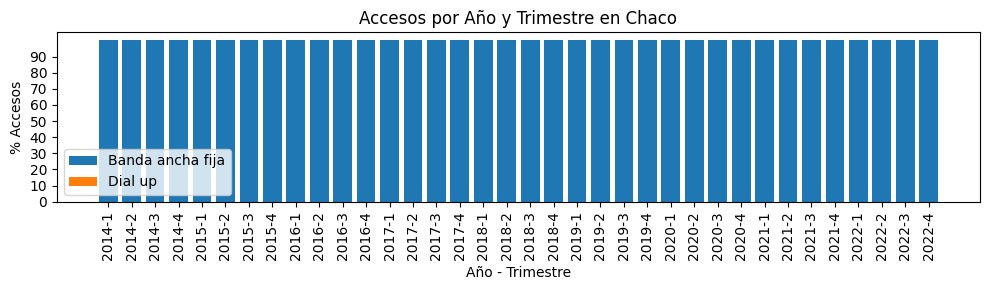

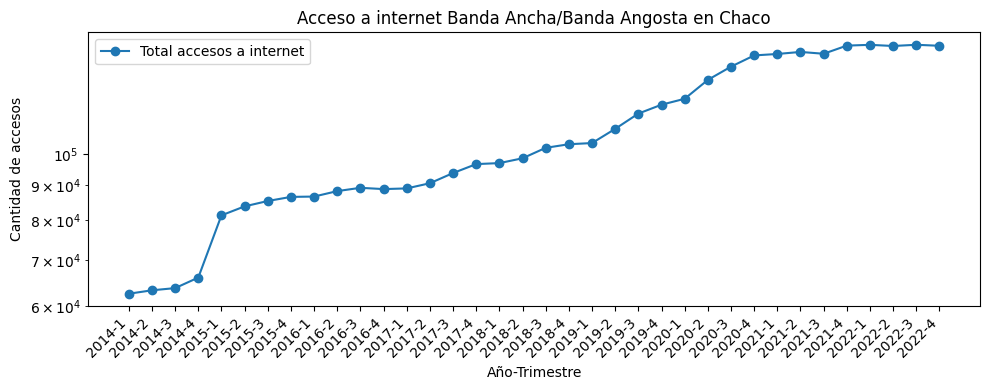

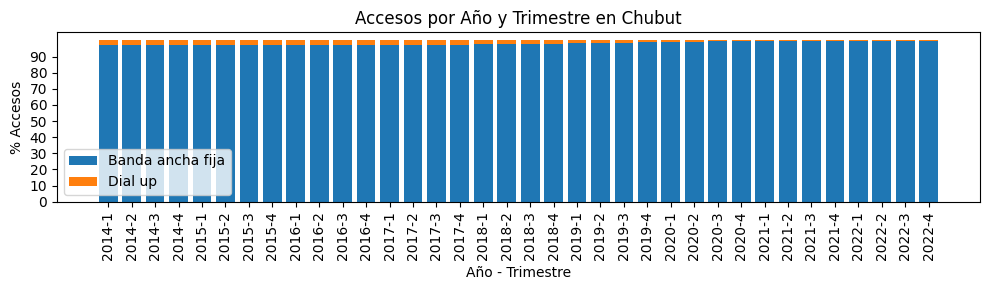

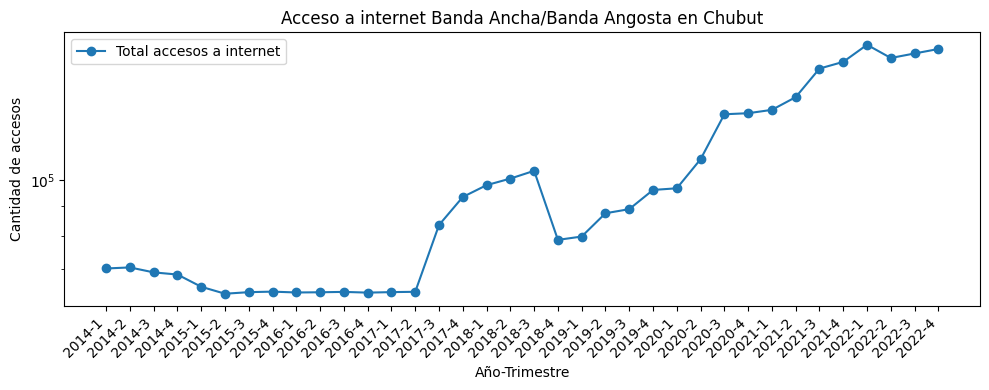

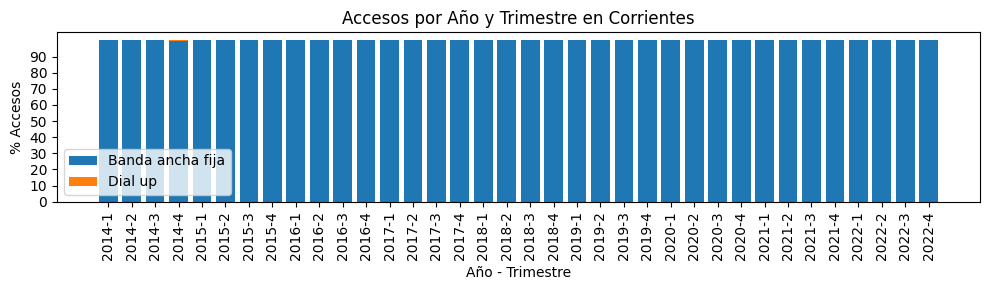

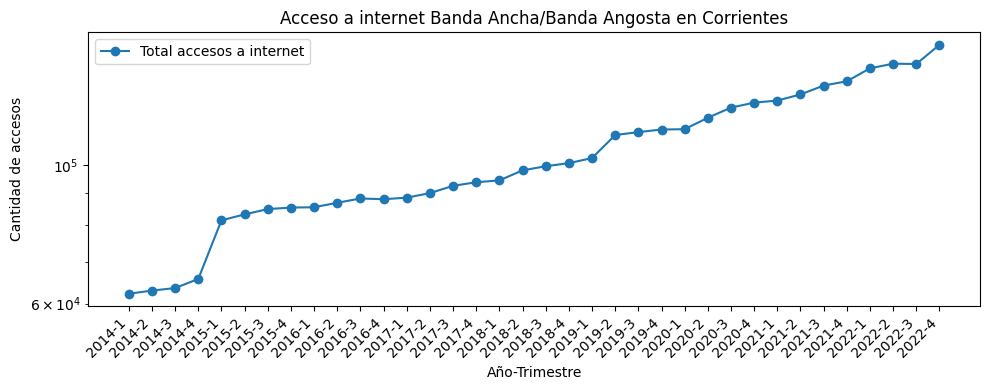

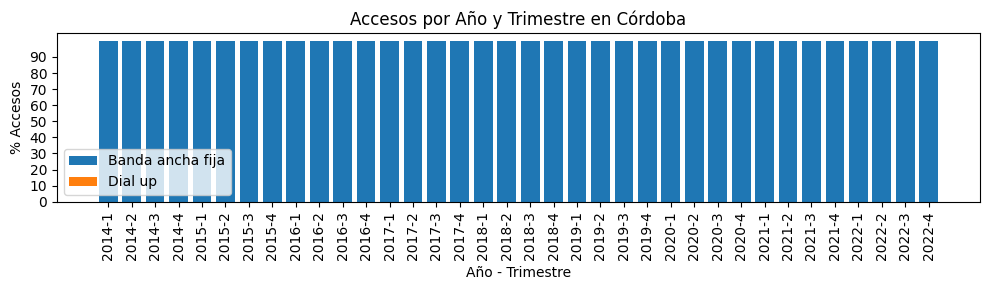

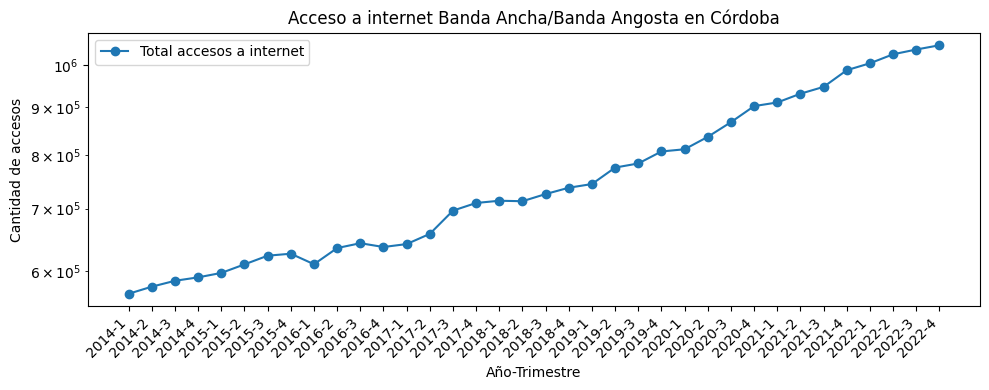

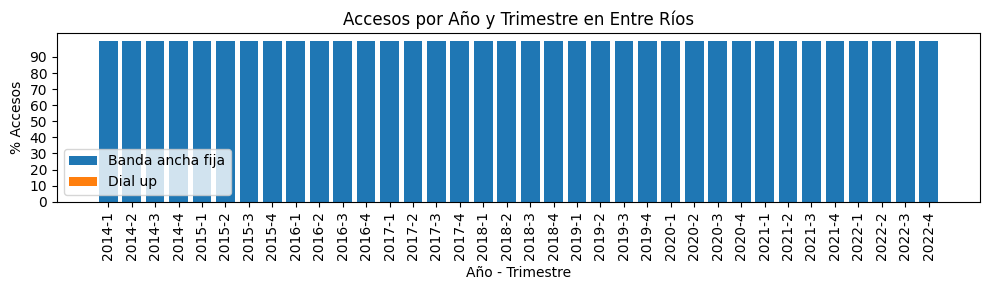

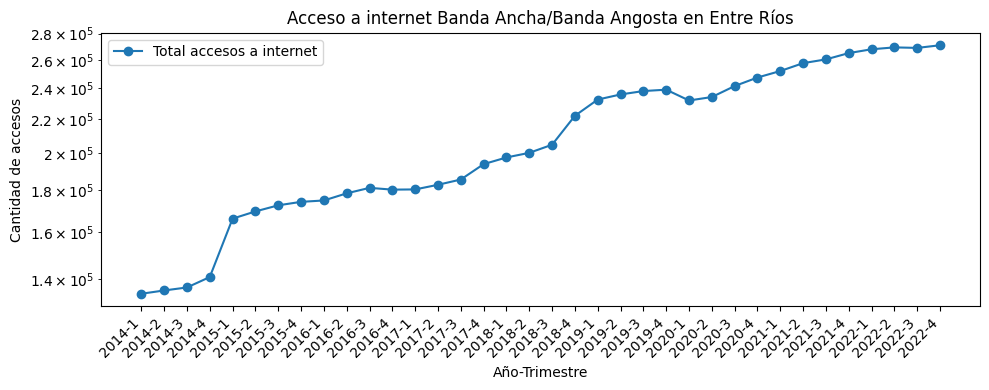

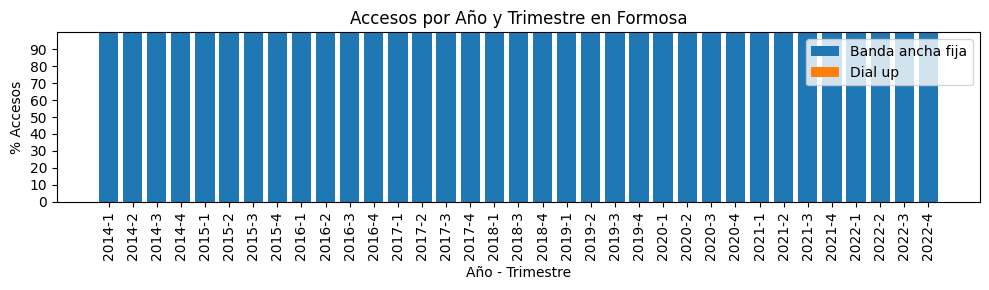

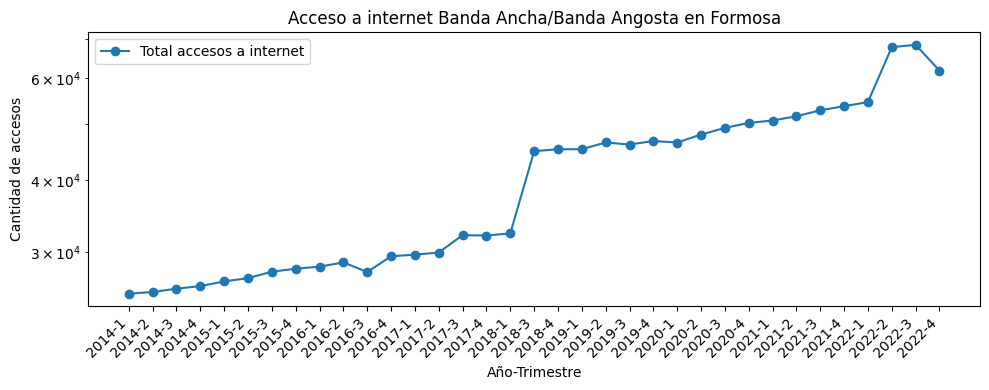

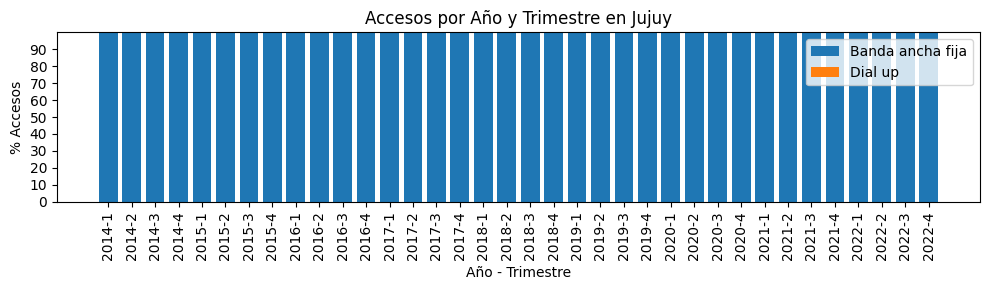

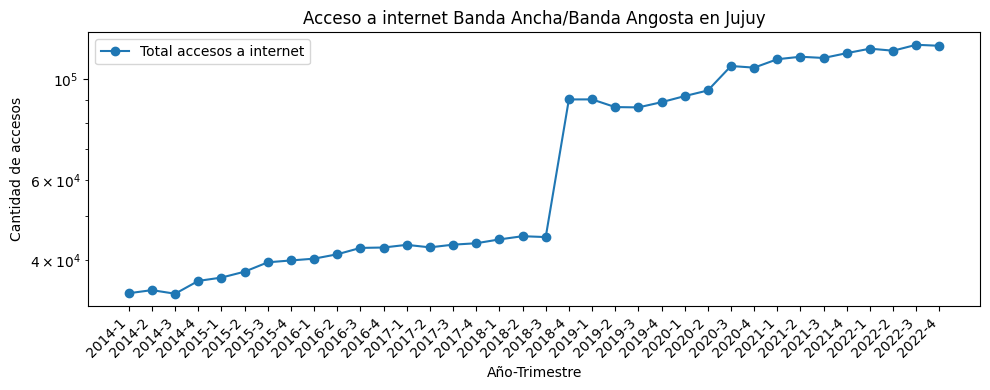

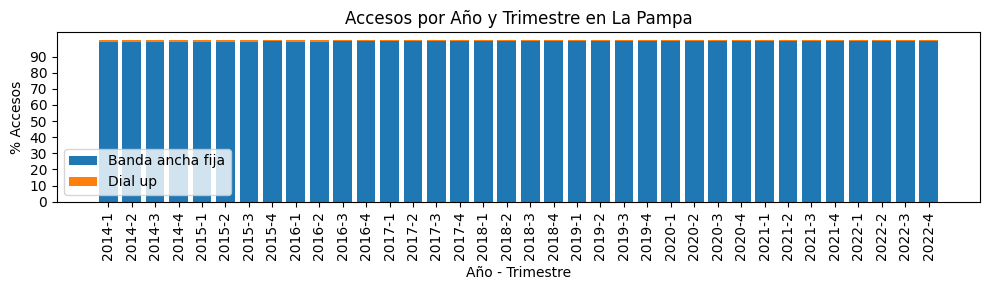

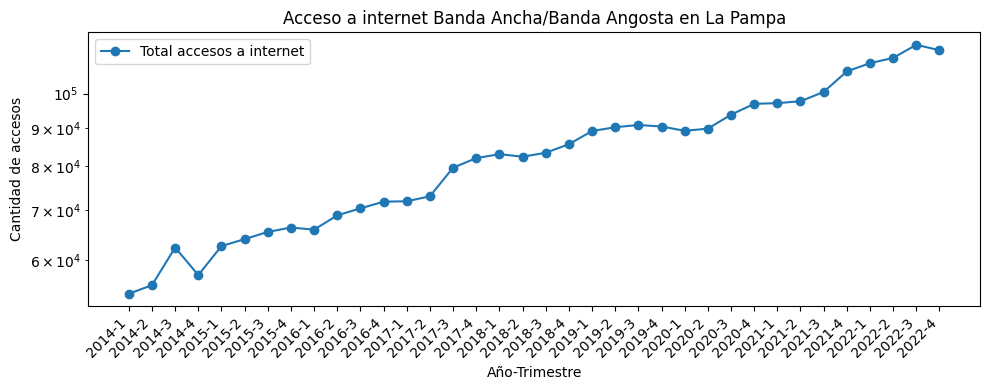

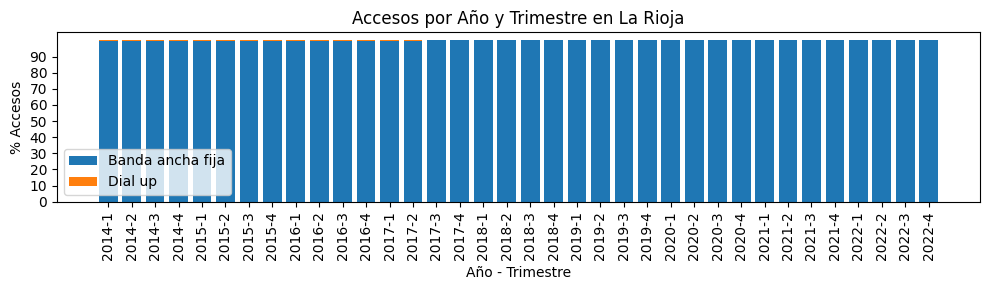

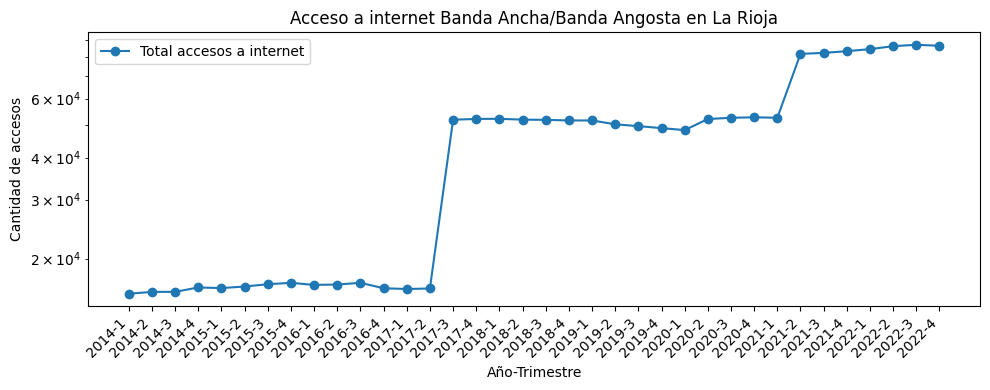

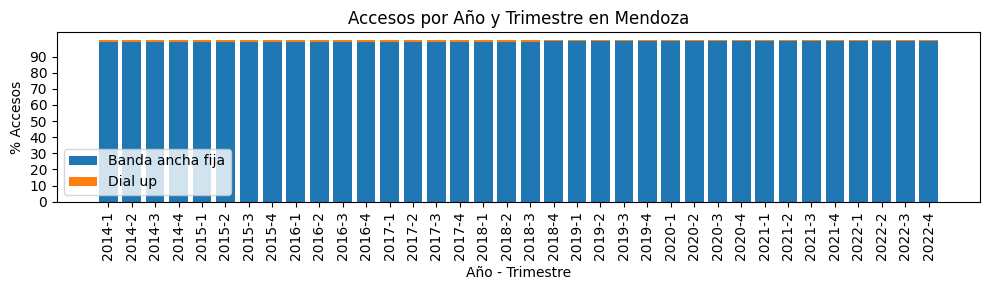

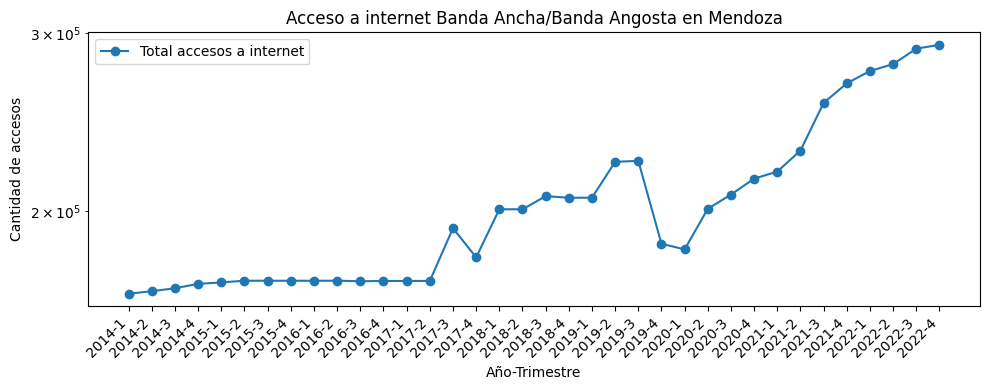

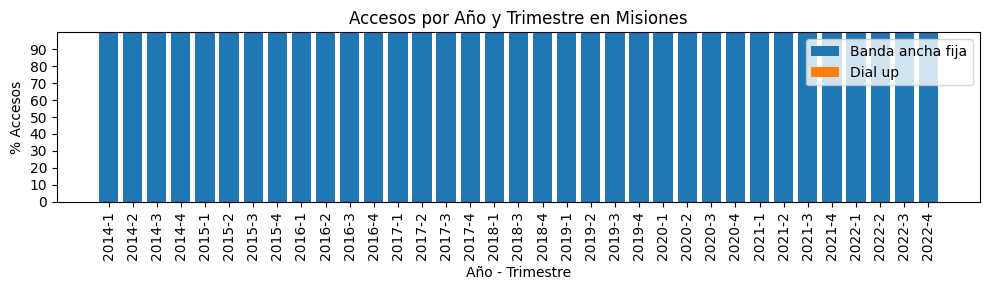

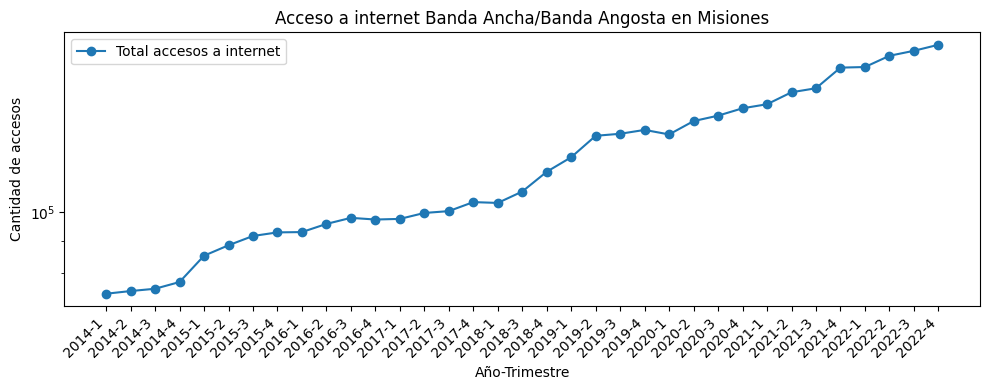

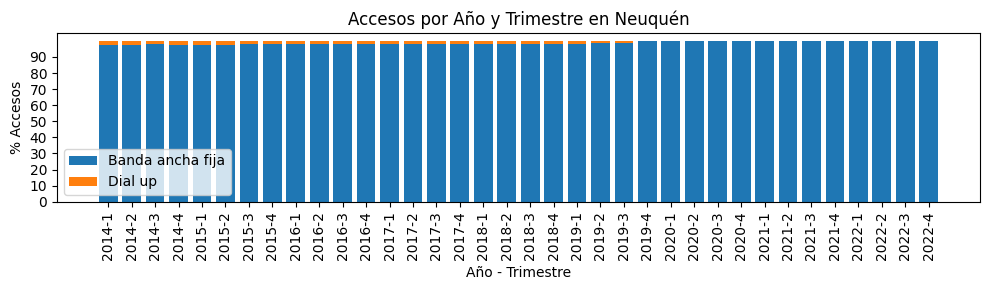

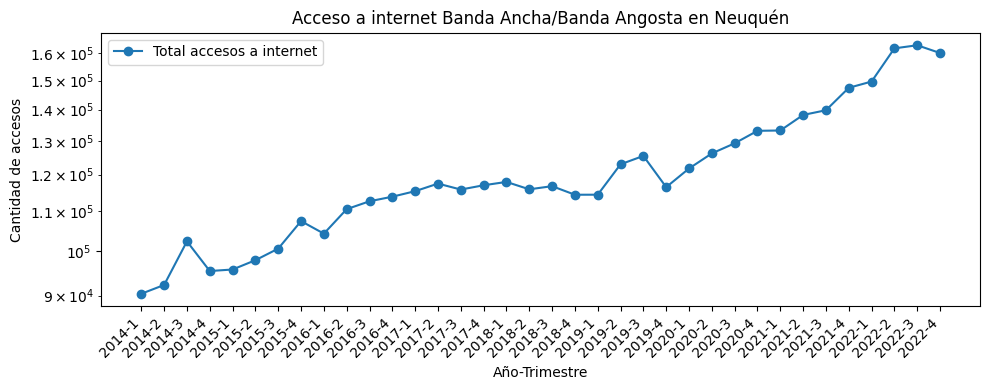

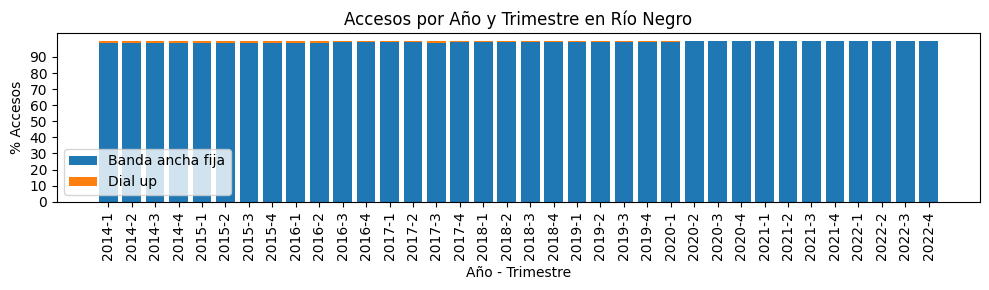

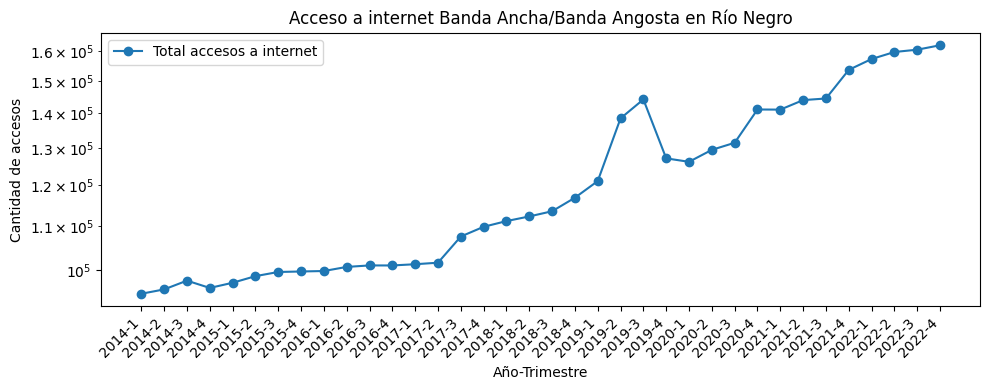

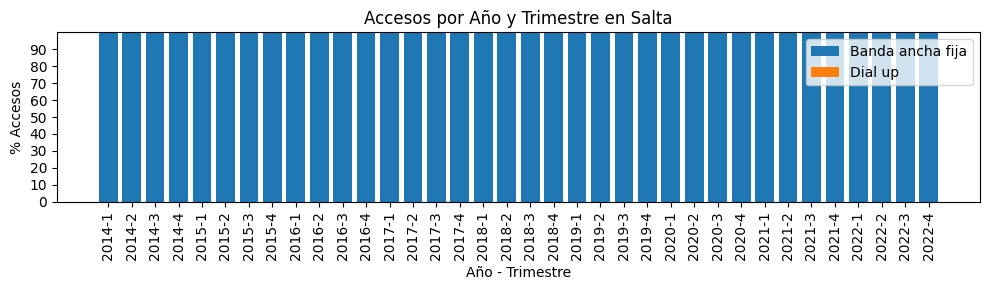

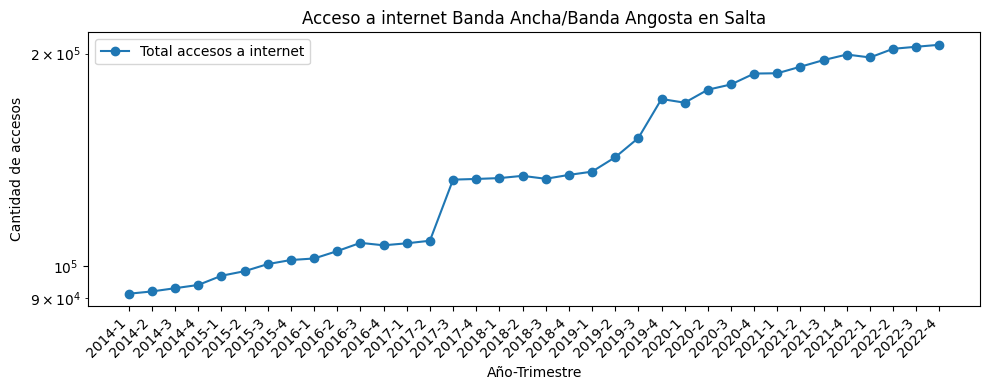

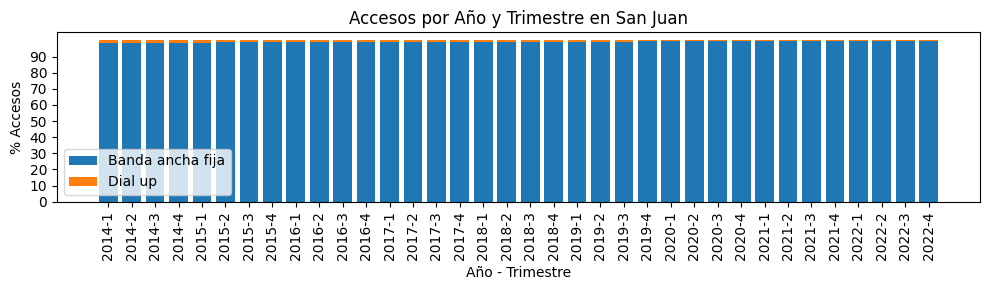

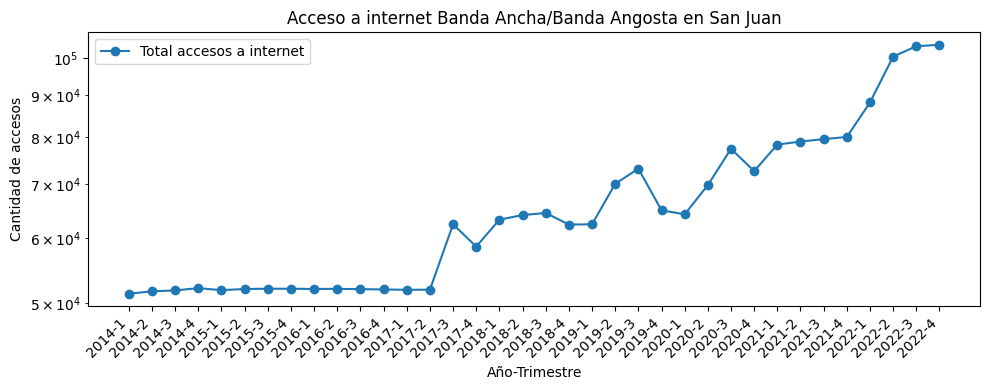

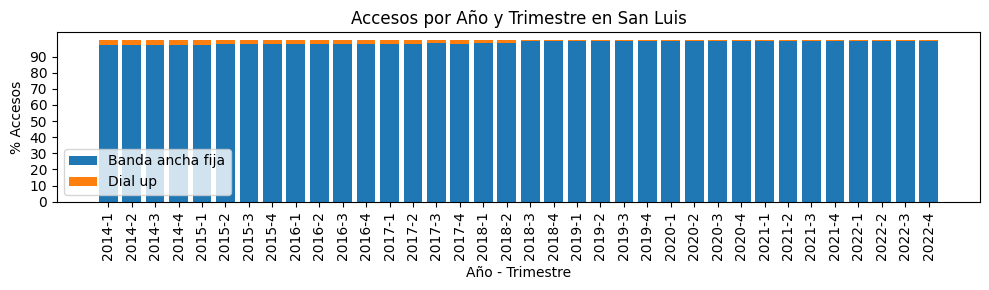

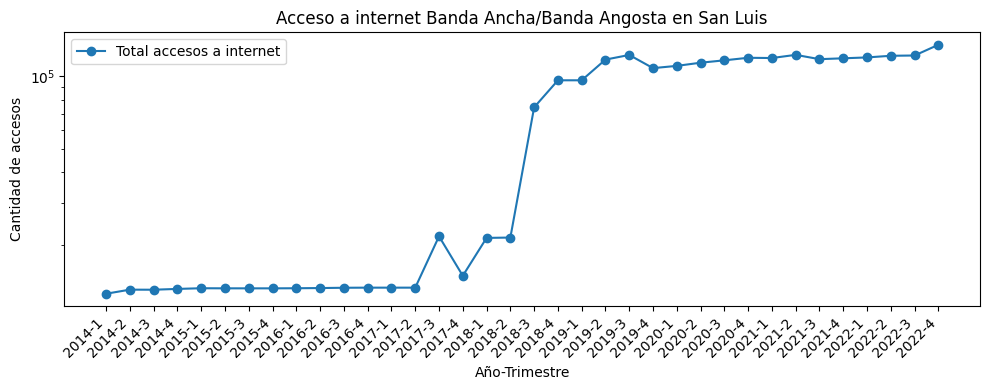

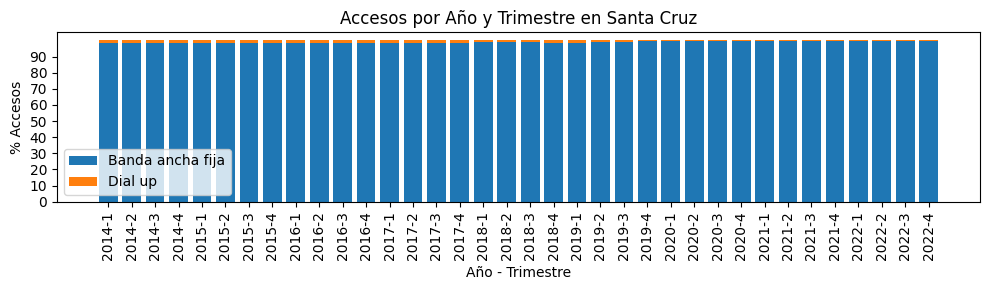

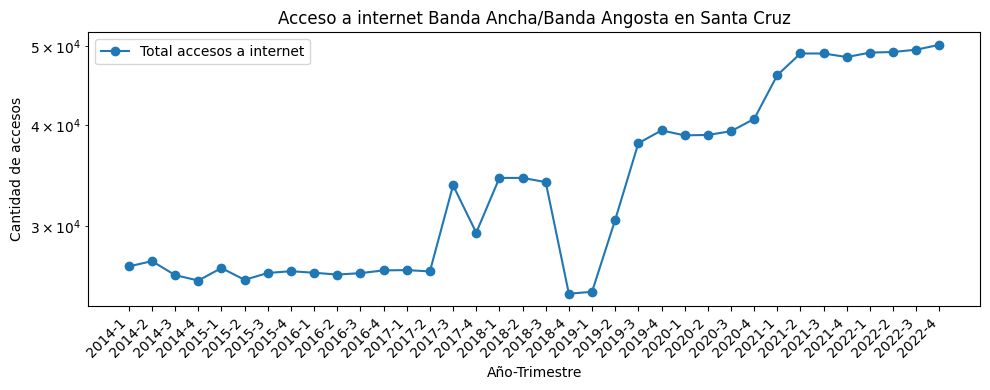

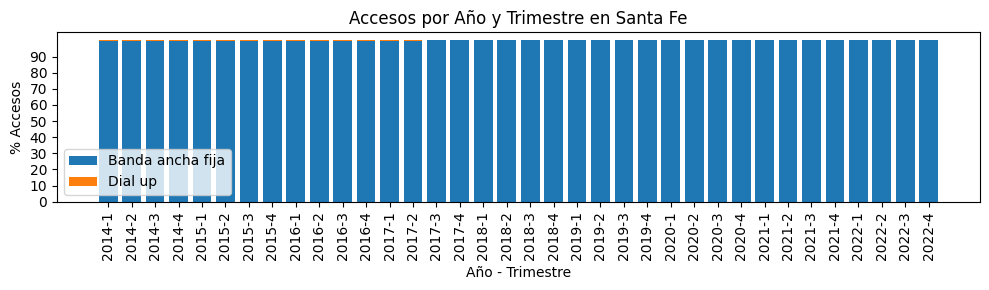

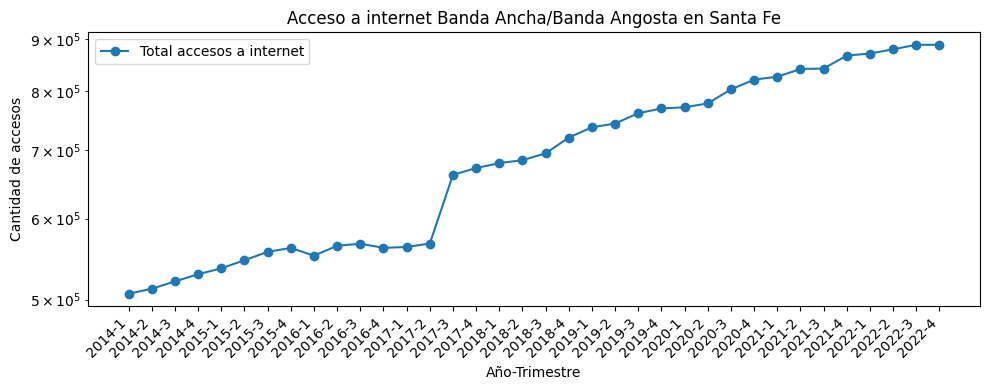

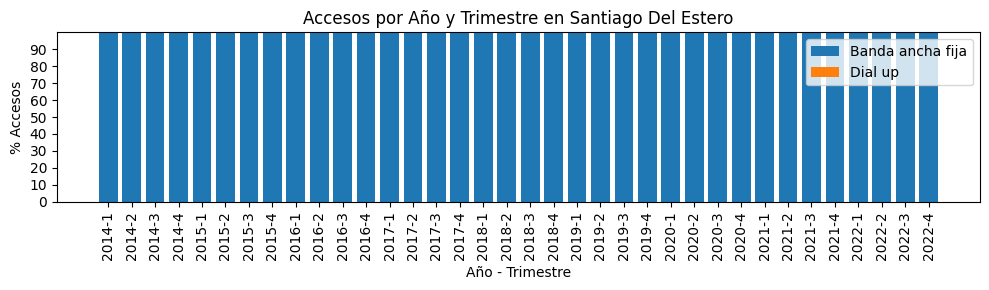

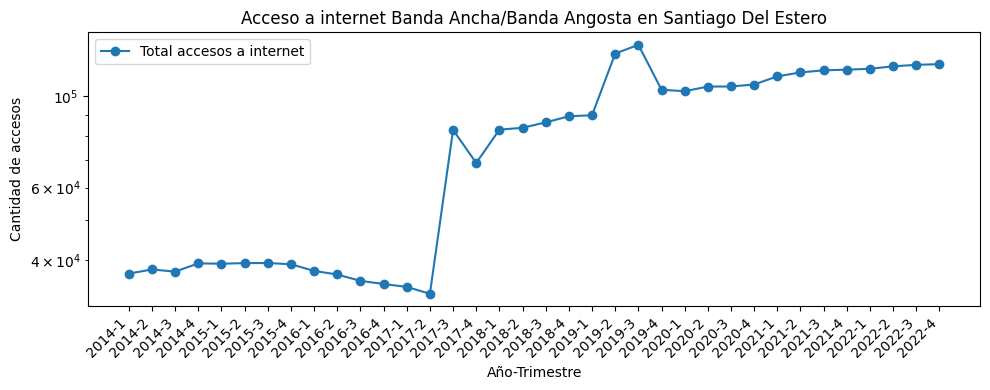

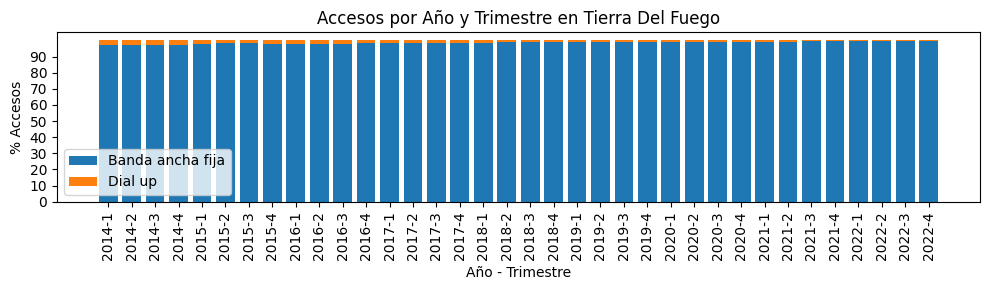

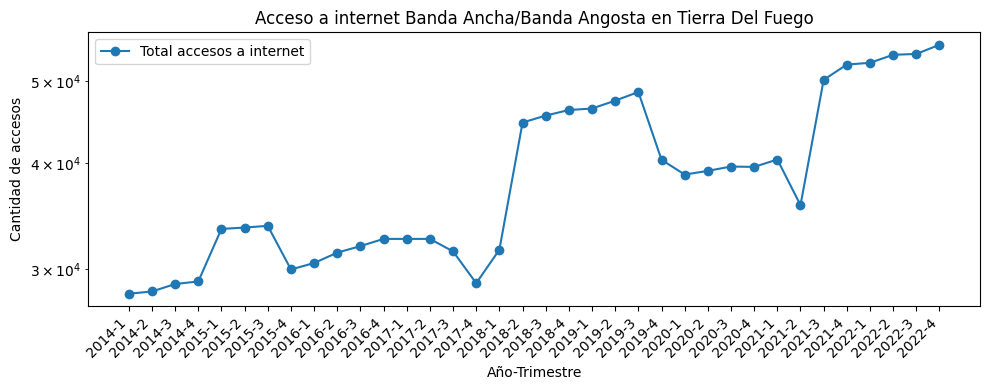

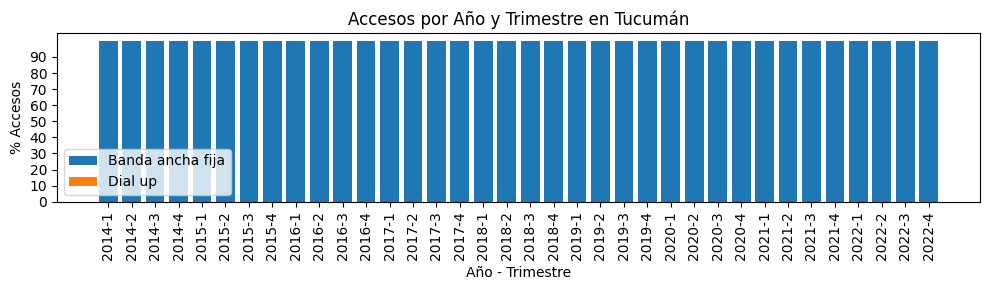

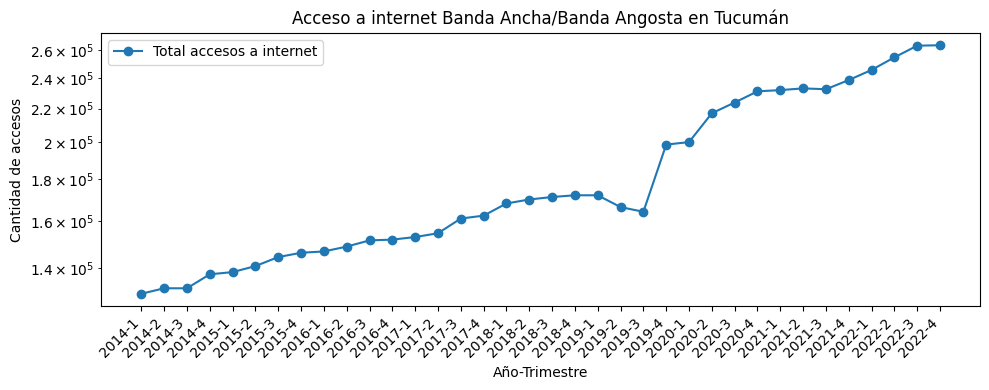

In [635]:
df_provincias = df_04.groupby(["Año", "Trimestre", "Provincia"])[["Banda ancha fija","Dial up","Total"]].sum().reset_index()

for elemento in df_provincias["Provincia"].unique():
    df = df_provincias[df_provincias["Provincia"] == elemento]
    plt.figure(figsize=(10, 3))

    plt.bar(df['Año'].astype(str) + '-' + df['Trimestre'].astype(str), (df["Banda ancha fija"]/df["Total"])*100, label='Banda ancha fija')
    plt.bar(df['Año'].astype(str) + '-' + df['Trimestre'].astype(str), (df['Dial up']/df["Total"])*100, bottom=(df["Banda ancha fija"]/df["Total"])*100, label='Dial up')

    plt.xlabel('Año - Trimestre')
    plt.ylabel('% Accesos')
    plt.title(f'Accesos por Año y Trimestre en {elemento}')
    plt.yticks(range(0, 100, 10))
    plt.xticks(rotation=90)
    plt.legend()

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.yscale('log')

    plt.plot(df['Año'].astype(str) + '-' + df['Trimestre'].astype(str), df["Total"], marker='o', linestyle='-', label= "Total accesos a internet")


    plt.xlabel('Año-Trimestre')
    plt.xticks(rotation=45, ha="right")
    plt.ylabel('Cantidad de accesos')
    plt.title(f'Acceso a internet Banda Ancha/Banda Angosta en {elemento}')
    plt.legend()
    plt.tight_layout()
    plt.show()

SERIE TRIMESTRAL DE ACCESOS A INTERNET FIJO POR TECNOLOGIA

In [636]:
df_05 = pd.read_csv("Internet_Accesos-por-tecnologia.csv", sep=';', na_values = ['NA', 'N/A', 'NaN', 'Missing'], dtype=str)
df_05 = df_05.dropna(axis=1, how='all')
df_05 = df_05.dropna()
df_05 = df_05.drop_duplicates()
df_05 = df_05.map(strip)
df_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           36 non-null     object
 1   Trimestre     36 non-null     object
 2   ADSL          36 non-null     object
 3   Cablemodem    36 non-null     object
 4   Fibra óptica  36 non-null     object
 5   Wireless      36 non-null     object
 6   Otros         36 non-null     object
 7   Total         36 non-null     object
 8   Periodo       36 non-null     object
dtypes: object(9)
memory usage: 2.7+ KB


In [637]:

df_05['ADSL'] = pd.to_numeric(df_05['ADSL'].str.replace('.',''))
df_05['Cablemodem'] = pd.to_numeric(df_05['Cablemodem'].str.replace('.',''))
df_05['Fibra óptica'] = pd.to_numeric(df_05['Fibra óptica'].str.replace('.',''))
df_05['Wireless'] = pd.to_numeric(df_05['Wireless'].str.replace('.',''))
df_05['Otros'] = pd.to_numeric(df_05['Otros'].str.replace('.',''))
df_05['Total'] = pd.to_numeric(df_05['Total'].str.replace('.',''))

df_05.head()

Año Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2022         4  1315373     6037457       3060575    572969  221740   
1  2022         3  1395277     6031970       2871541    557110  235230   
2  2022         2  1468333     5979214       2723285    556243  231609   
3  2022         1  1533240     6073426       2219533    545814  251996   
4  2021         4  1657615     5984240       2072236    523107  252596   

      Total        Periodo  
0  11208114   Oct-Dic 2022  
1  11091128  Jul-Sept 2022  
2  10958684   Abr-Jun 2022  
3  10624009   Ene-Mar 2022  
4  10489794   Oct-Dic 2021

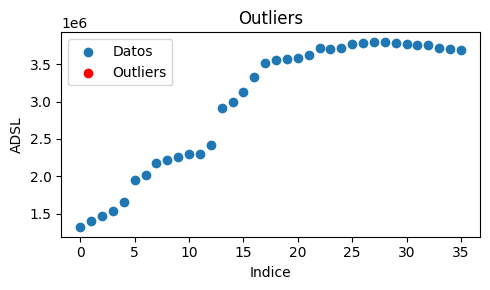

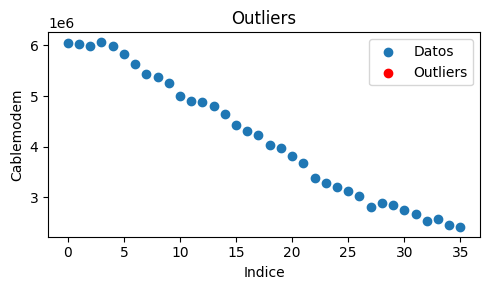

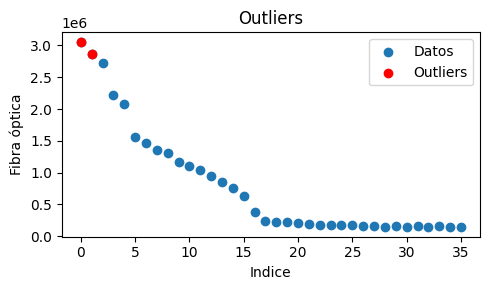

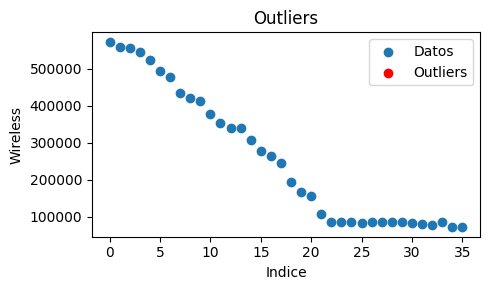

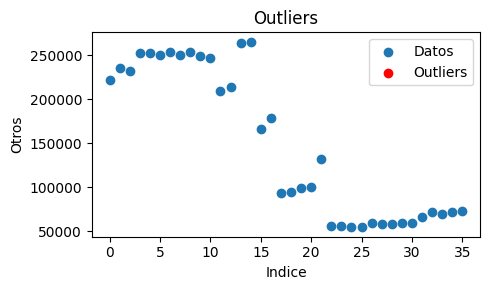

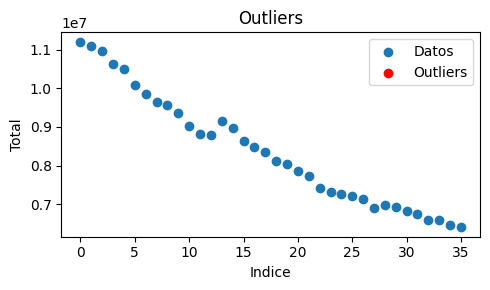

In [638]:
# Calcular quartiles
Q1 = df_05["ADSL"].quantile(0.25)
Q3 = df_05["ADSL"].quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral
umbral_outliers = 1.5 * IQR

# Marcar outliers en el gráfico de dispersión
outliers = df_05[(df_05["ADSL"] < Q1 - umbral_outliers) | (df_05["ADSL"] > Q3 + umbral_outliers)]

plt.figure(figsize=(5, 3))
plt.scatter(df_05.index, df_05["ADSL"], label='Datos')
plt.scatter(outliers.index, outliers['ADSL'], color='red', label='Outliers')

# Etiquetas y título
plt.xlabel('Indice')
plt.ylabel('ADSL')
plt.title('Outliers')
plt.legend()

plt.tight_layout()
plt.show()


# Calcular quartiles
Q1 = df_05["Cablemodem"].quantile(0.25)
Q3 = df_05["Cablemodem"].quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral
umbral_outliers = 1.5 * IQR

# Marcar outliers en el gráfico de dispersión
outliers = df_05[(df_05["Cablemodem"] < Q1 - umbral_outliers) | (df_05["Cablemodem"] > Q3 + umbral_outliers)]

plt.figure(figsize=(5, 3))
plt.scatter(df_05.index, df_05["Cablemodem"], label='Datos')
plt.scatter(outliers.index, outliers['Cablemodem'], color='red', label='Outliers')

# Etiquetas y título
plt.xlabel('Indice')
plt.ylabel('Cablemodem')
plt.title('Outliers')
plt.legend()

plt.tight_layout()
plt.show()


# Calcular quartiles
Q1 = df_05["Fibra óptica"].quantile(0.25)
Q3 = df_05["Fibra óptica"].quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral
umbral_outliers = 1.5 * IQR

# Marcar outliers en el gráfico de dispersión
outliers = df_05[(df_05["Fibra óptica"] < Q1 - umbral_outliers) | (df_05["Fibra óptica"] > Q3 + umbral_outliers)]

plt.figure(figsize=(5, 3))
plt.scatter(df_05.index, df_05["Fibra óptica"], label='Datos')
plt.scatter(outliers.index, outliers['Fibra óptica'], color='red', label='Outliers')

# Etiquetas y título
plt.xlabel('Indice')
plt.ylabel('Fibra óptica')
plt.title('Outliers')
plt.legend()

plt.tight_layout()
plt.show()


# Calcular quartiles
Q1 = df_05["Wireless"].quantile(0.25)
Q3 = df_05["Wireless"].quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral
umbral_outliers = 1.5 * IQR

# Marcar outliers en el gráfico de dispersión
outliers = df_05[(df_05["Wireless"] < Q1 - umbral_outliers) | (df_05["Wireless"] > Q3 + umbral_outliers)]

plt.figure(figsize=(5, 3))
plt.scatter(df_05.index, df_05["Wireless"], label='Datos')
plt.scatter(outliers.index, outliers['Wireless'], color='red', label='Outliers')

# Etiquetas y título
plt.xlabel('Indice')
plt.ylabel('Wireless')
plt.title('Outliers')
plt.legend()

plt.tight_layout()
plt.show()


# Calcular quartiles
Q1 = df_05["Otros"].quantile(0.25)
Q3 = df_05["Otros"].quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral
umbral_outliers = 1.5 * IQR

# Marcar outliers en el gráfico de dispersión
outliers = df_05[(df_05["Otros"] < Q1 - umbral_outliers) | (df_05["Otros"] > Q3 + umbral_outliers)]

plt.figure(figsize=(5, 3))
plt.scatter(df_05.index, df_05["Otros"], label='Datos')
plt.scatter(outliers.index, outliers['Otros'], color='red', label='Outliers')

# Etiquetas y título
plt.xlabel('Indice')
plt.ylabel('Otros')
plt.title('Outliers')
plt.legend()

plt.tight_layout()
plt.show()


# Calcular quartiles
Q1 = df_05["Total"].quantile(0.25)
Q3 = df_05["Total"].quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral
umbral_outliers = 1.5 * IQR

# Marcar outliers en el gráfico de dispersión
outliers = df_05[(df_05["Total"] < Q1 - umbral_outliers) | (df_05["Total"] > Q3 + umbral_outliers)]

plt.figure(figsize=(5, 3))
plt.scatter(df_05.index, df_05["Total"], label='Datos')
plt.scatter(outliers.index, outliers['Total'], color='red', label='Outliers')

# Etiquetas y título
plt.xlabel('Indice')
plt.ylabel('Total')
plt.title('Outliers')
plt.legend()

plt.tight_layout()
plt.show()


In [639]:
df_05["Fibra óptica"].describe()

count    3.600000e+01
mean     8.035492e+05
std      8.660955e+05
min      1.391870e+05
25%      1.680880e+05
50%      2.368255e+05
75%      1.205959e+06
max      3.060575e+06
Name: Fibra óptica, dtype: float64

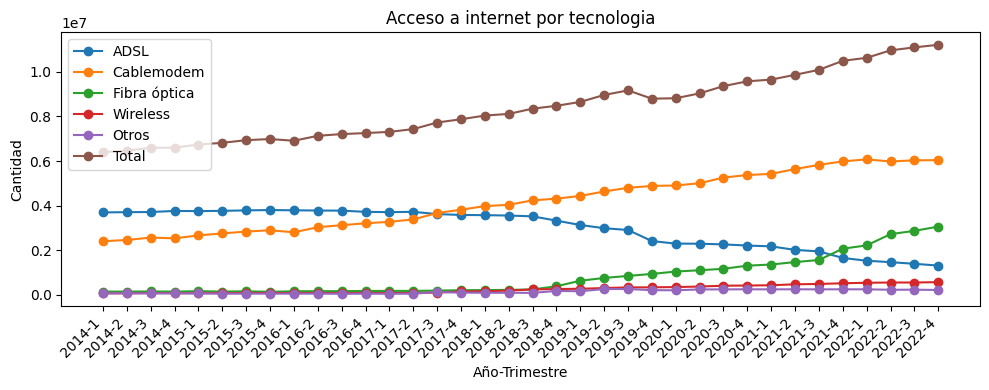

In [640]:
df_05 = df_05.sort_values(by=['Año', 'Trimestre'])

plt.figure(figsize=(10, 4))

plt.plot(df_05['Año'].astype(str) + '-' + df_05['Trimestre'].astype(str), df_05["ADSL"], marker='o', linestyle='-', label= "ADSL")
plt.plot(df_05['Año'].astype(str) + '-' + df_05['Trimestre'].astype(str), df_05["Cablemodem"], marker='o', linestyle='-', label= "Cablemodem")
plt.plot(df_05['Año'].astype(str) + '-' + df_05['Trimestre'].astype(str), df_05["Fibra óptica"], marker='o', linestyle='-', label= "Fibra óptica")
plt.plot(df_05['Año'].astype(str) + '-' + df_05['Trimestre'].astype(str), df_05["Wireless"], marker='o', linestyle='-', label= "Wireless")
plt.plot(df_05['Año'].astype(str) + '-' + df_05['Trimestre'].astype(str), df_05["Otros"], marker='o', linestyle='-', label= "Otros")
plt.plot(df_05['Año'].astype(str) + '-' + df_05['Trimestre'].astype(str), df_05["Total"], marker='o', linestyle='-', label= "Total")

# Etiquetas y leyenda
plt.xlabel('Año-Trimestre')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Cantidad')
plt.title('Acceso a internet por tecnologia')

plt.legend()
plt.tight_layout()
plt.show()

ACCESO A INTERNET FIJO POR TECNOLOGIA Y PROVINCIA

In [641]:
df_06 = pd.read_csv("Internet_Accesos-por-tecnologia_provincias.csv", sep=';', na_values = ['NA', 'N/A', 'NaN', 'Missing'], dtype=str)
df_06 = df_06.dropna(axis=1, how='all')
df_06 = df_06.dropna()
df_06 = df_06.drop_duplicates()
df_06 = df_06.map(strip)
df_06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           864 non-null    object
 1   Trimestre     864 non-null    object
 2   Provincia     864 non-null    object
 3   ADSL          864 non-null    object
 4   Cablemodem    864 non-null    object
 5   Fibra óptica  864 non-null    object
 6   Wireless      864 non-null    object
 7   Otros         864 non-null    object
 8   Total         864 non-null    object
dtypes: object(9)
memory usage: 60.9+ KB


In [642]:
df_06['ADSL'] = pd.to_numeric(df_06['ADSL'].str.replace('.',''))
df_06['Cablemodem'] = pd.to_numeric(df_06['Cablemodem'].str.replace('.',''))
df_06['Fibra óptica'] = pd.to_numeric(df_06['Fibra óptica'].str.replace('.',''))
df_06['Wireless'] = pd.to_numeric(df_06['Wireless'].str.replace('.',''))
df_06['Otros'] = pd.to_numeric(df_06['Otros'].str.replace('.',''))
df_06['Total'] = pd.to_numeric(df_06['Total'].str.replace('.',''))

df_06.head()


Año Trimestre        Provincia    ADSL  Cablemodem  Fibra óptica  \
0  2022         4     Buenos Aires  325908     2767247       1499149   
1  2022         4  Capital Federal  138753     1238196        138548   
2  2022         4        Catamarca    8952       10998         47337   
3  2022         4            Chaco   24582       61265         47285   
4  2022         4           Chubut   45450       73923          9815   

   Wireless  Otros    Total  
0    129910  72451  4794665  
1      4603  31826  1551926  
2      1379   2243    70909  
3      7957   2574   143663  
4     30721   8850   168759

In [643]:
palabra = r'\bCórdob\b'
df_06['Provincia'] = df_06['Provincia'].str.replace(palabra, 'Córdoba', regex=True)
palabra = r'\bEntre Río\b'
df_06['Provincia'] = df_06['Provincia'].str.replace(palabra, 'Entre Ríos', regex=True)
palabra = r'\bNeuqué\b'
df_06['Provincia'] = df_06['Provincia'].str.replace(palabra, 'Neuquén', regex=True)
palabra = r'\bRío Negr\b'
df_06['Provincia'] = df_06['Provincia'].str.replace(palabra, 'Río Negro', regex=True)
palabra = r'\bTucumá\b'
df_06['Provincia'] = df_06['Provincia'].str.replace(palabra, 'Tucumán', regex=True)

print(len(df_06['Provincia'].unique()))
df_06['Provincia'].unique()


24


array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

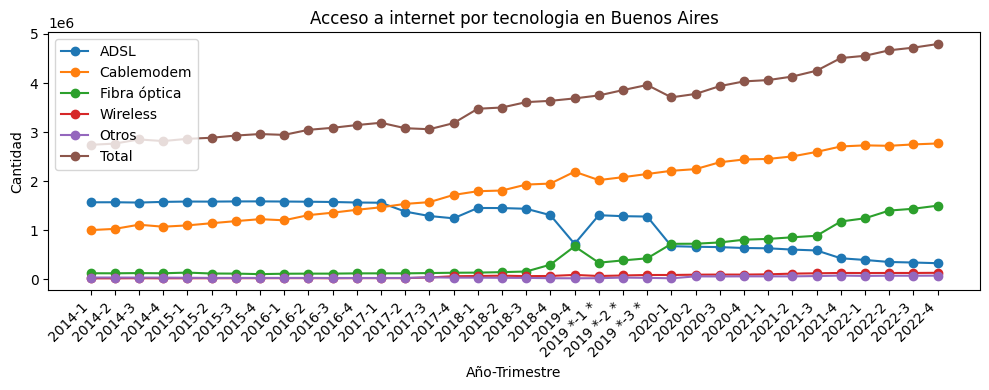

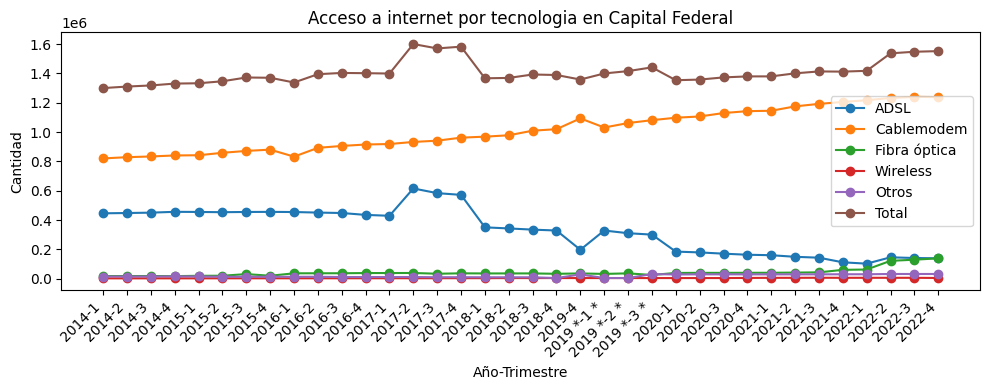

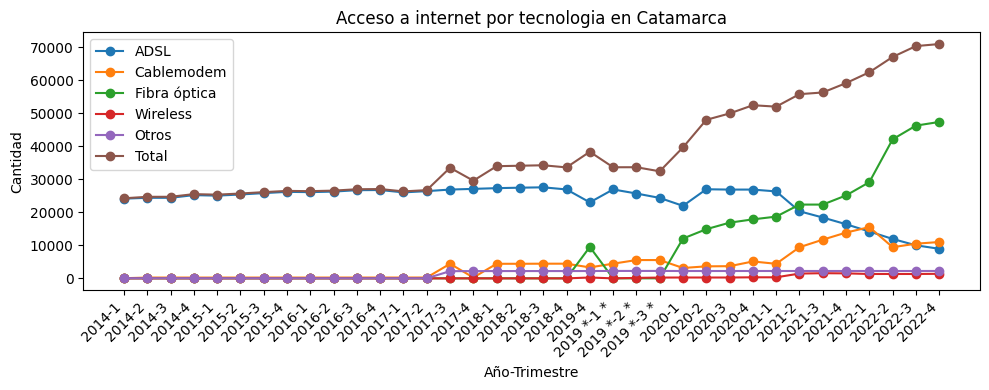

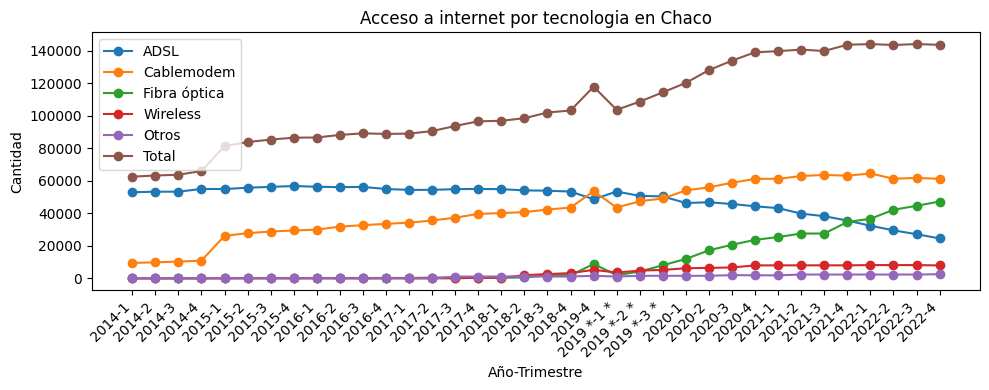

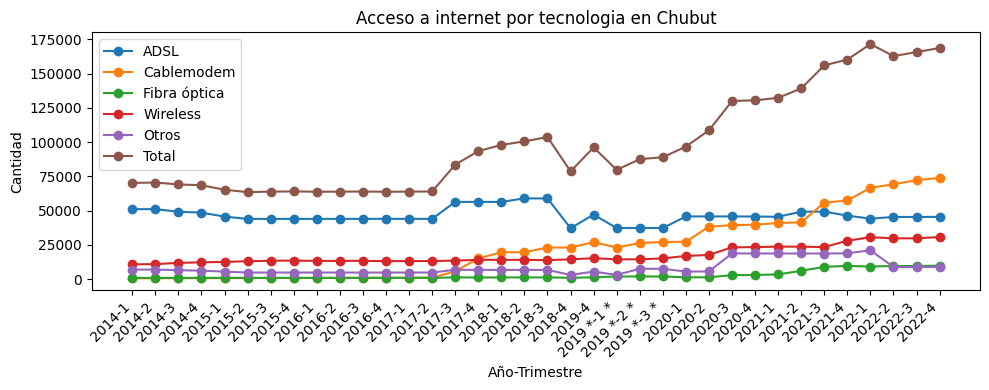

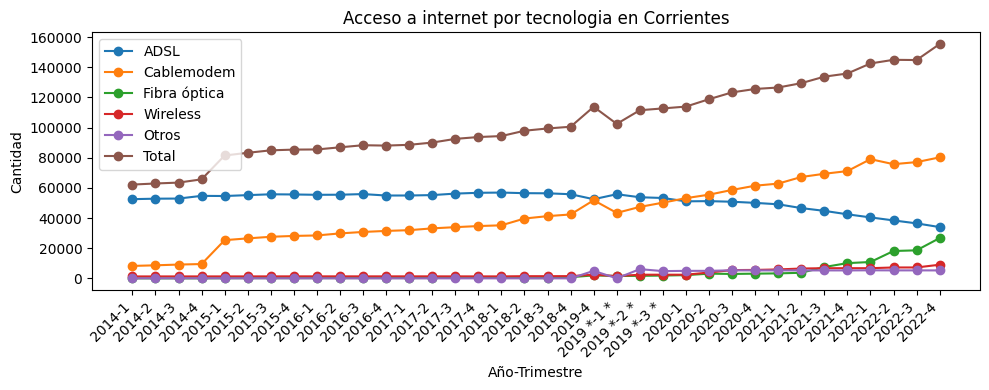

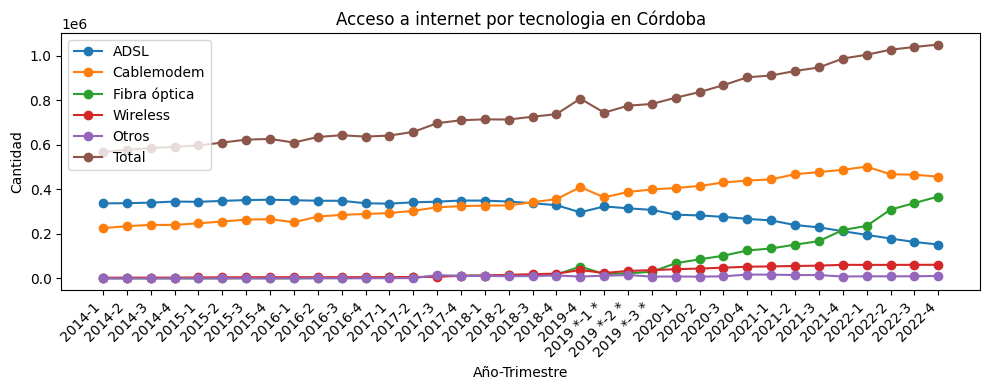

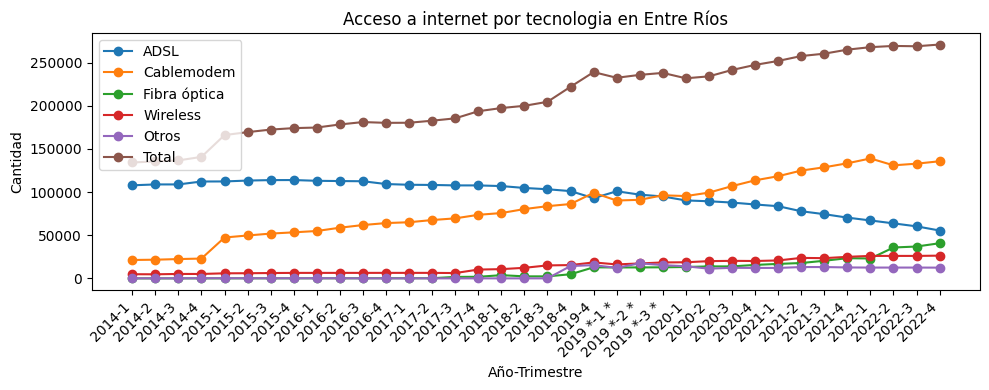

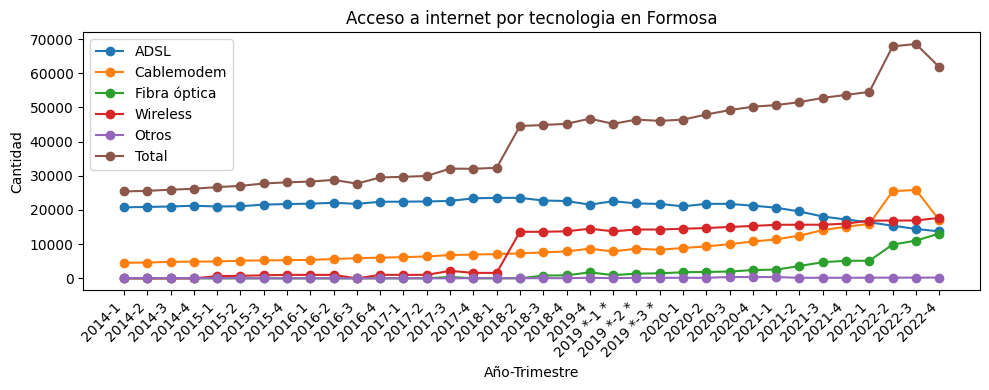

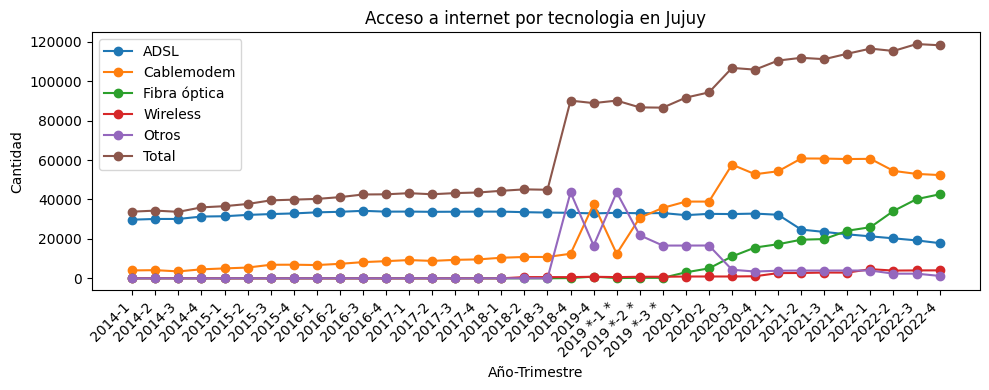

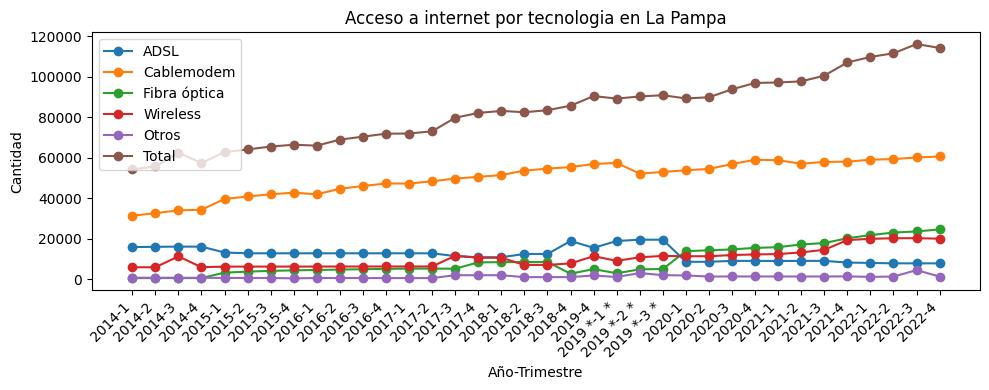

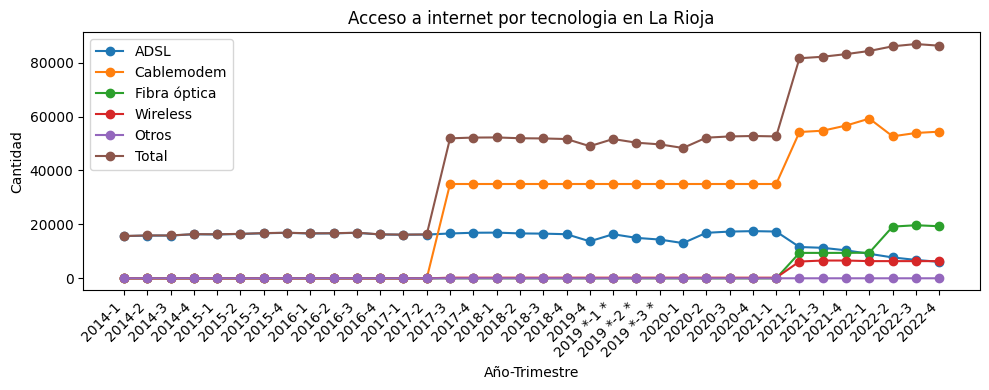

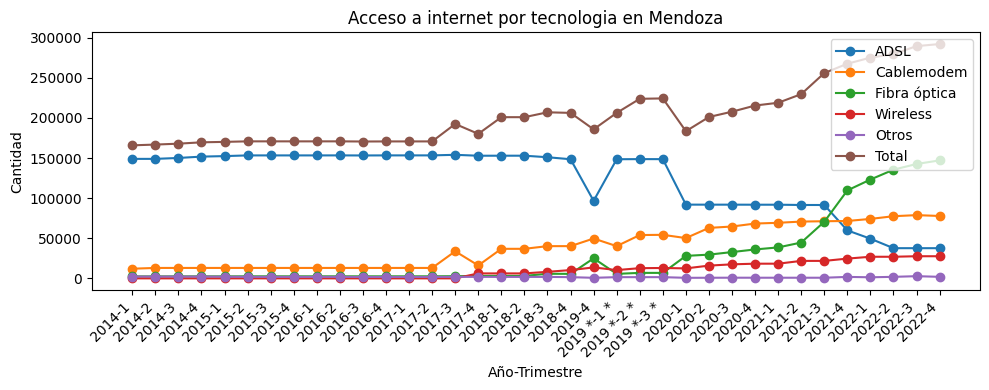

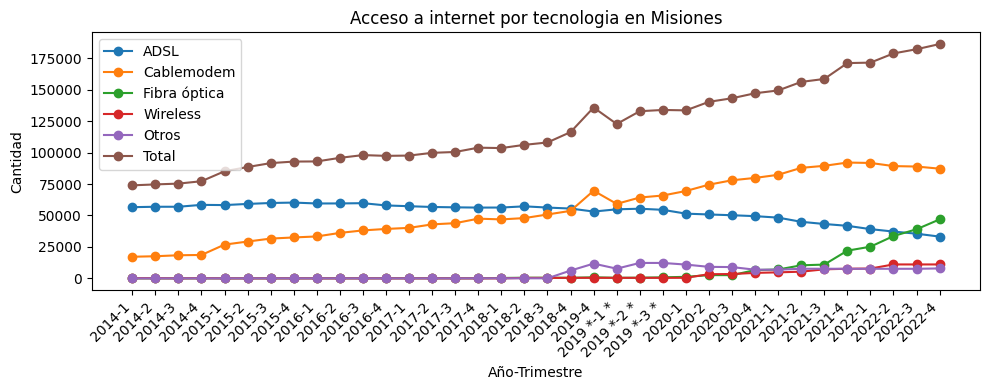

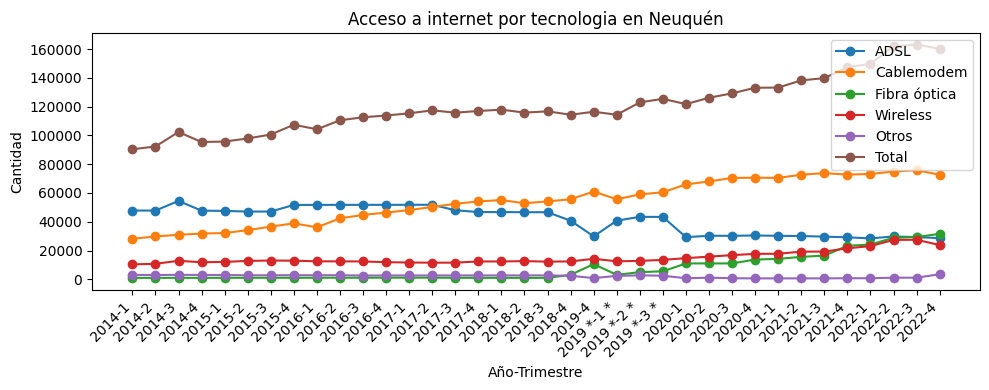

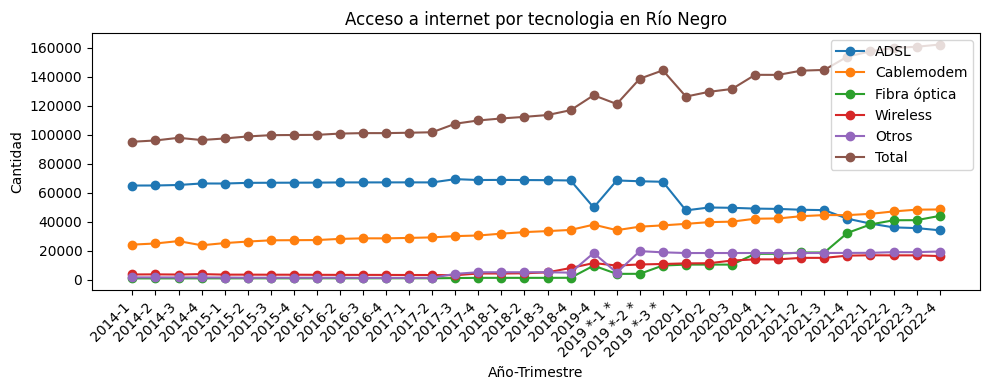

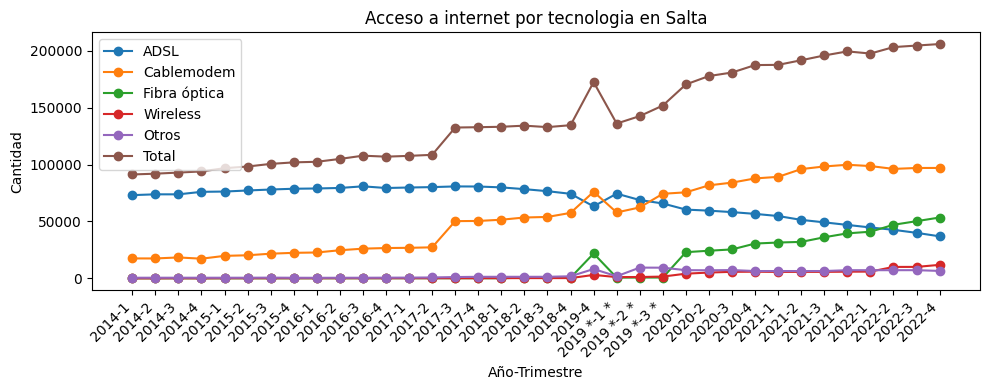

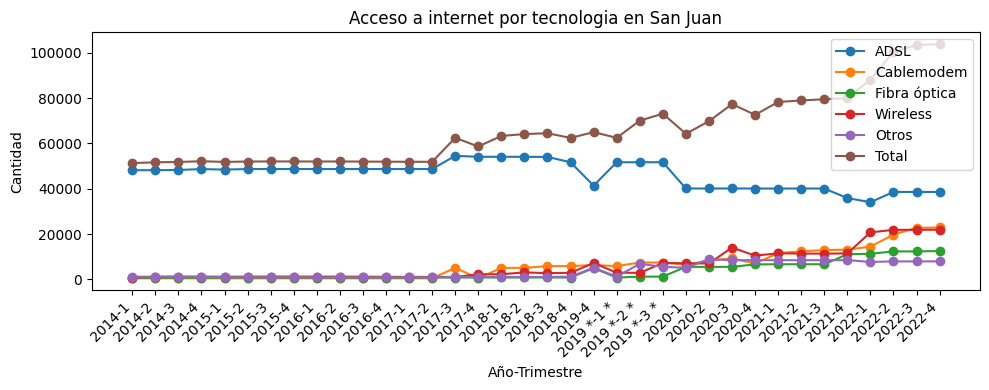

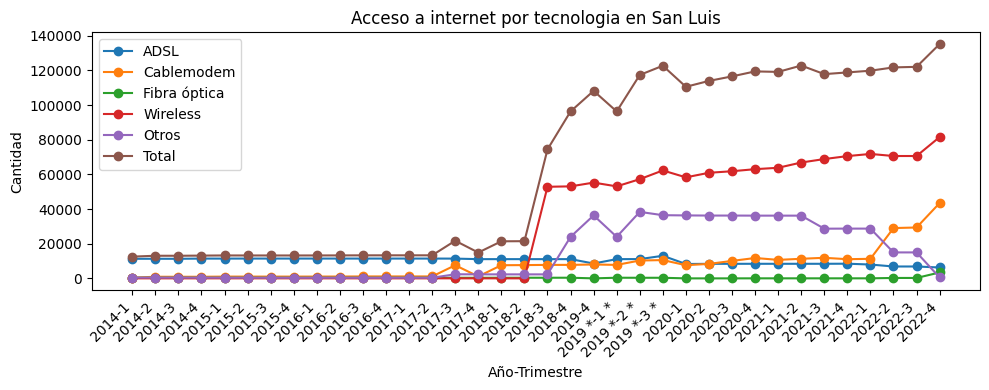

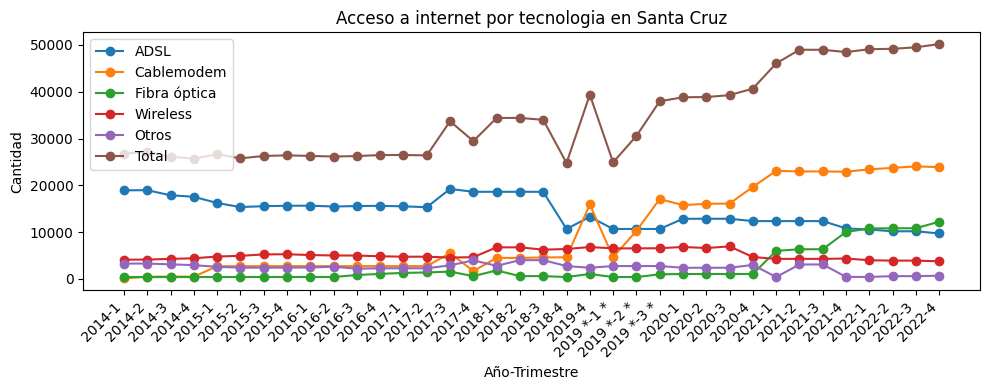

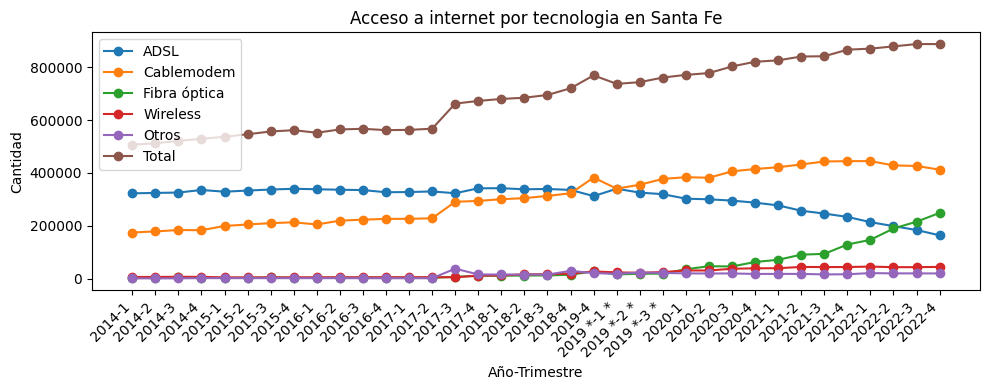

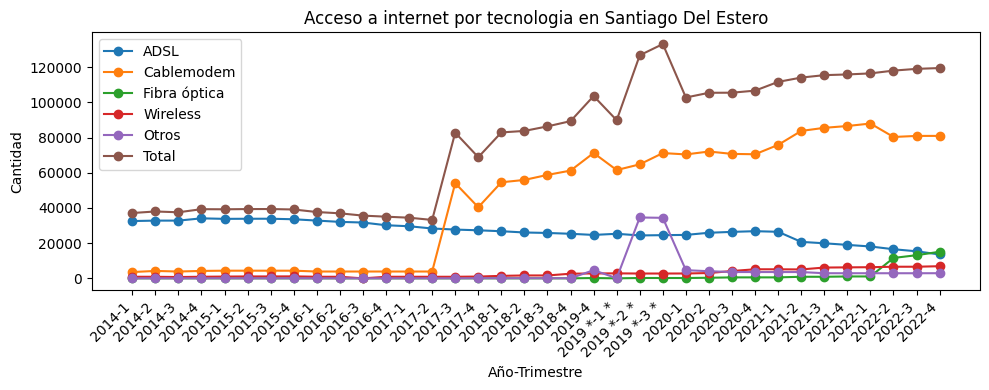

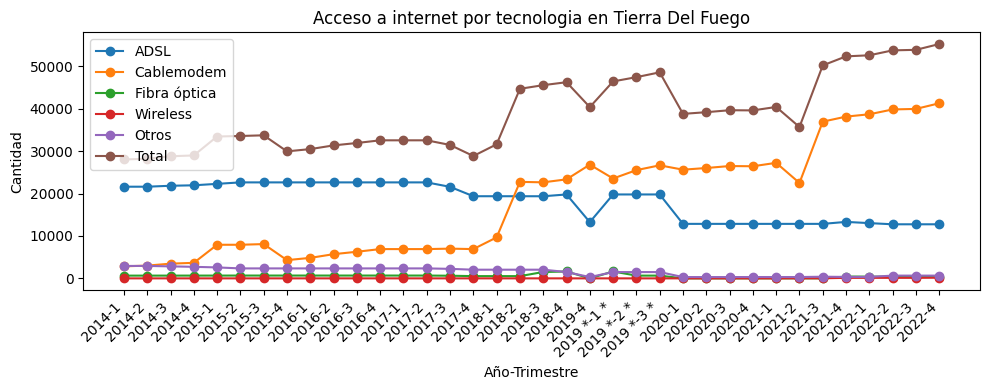

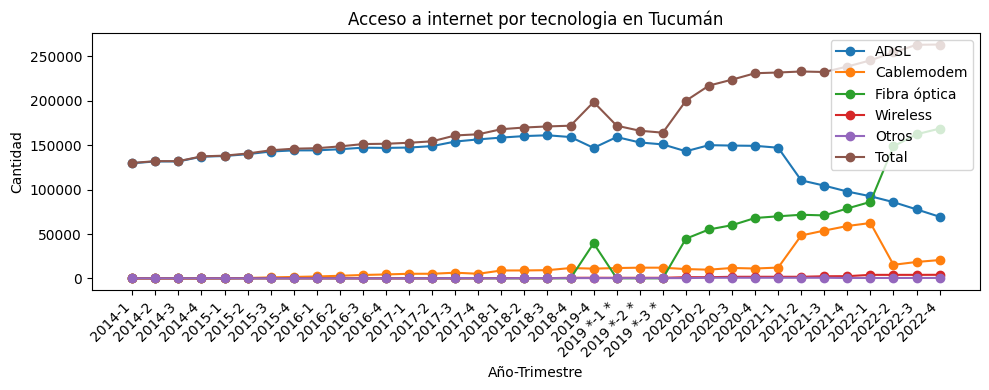

In [644]:
df_06 = df_06.sort_values(by=['Año', 'Trimestre', 'Provincia'])

for elemento in df_06['Provincia'].unique():
    df = df_06[df_06['Provincia'] == elemento]
    plt.figure(figsize=(10, 4))

    plt.plot(df['Año'].astype(str) + '-' + df['Trimestre'].astype(str), df["ADSL"], marker='o', linestyle='-', label= "ADSL")
    plt.plot(df['Año'].astype(str) + '-' + df['Trimestre'].astype(str), df["Cablemodem"], marker='o', linestyle='-', label= "Cablemodem")
    plt.plot(df['Año'].astype(str) + '-' + df['Trimestre'].astype(str), df["Fibra óptica"], marker='o', linestyle='-', label= "Fibra óptica")
    plt.plot(df['Año'].astype(str) + '-' + df['Trimestre'].astype(str), df["Wireless"], marker='o', linestyle='-', label= "Wireless")
    plt.plot(df['Año'].astype(str) + '-' + df['Trimestre'].astype(str), df["Otros"], marker='o', linestyle='-', label= "Otros")
    plt.plot(df['Año'].astype(str) + '-' + df['Trimestre'].astype(str), df["Total"], marker='o', linestyle='-', label= "Total")

    # Etiquetas y leyenda
    plt.xlabel('Año-Trimestre')
    plt.xticks(rotation=45, ha="right")
    plt.ylabel('Cantidad')
    plt.title(f'Acceso a internet por tecnologia en {elemento}')

    plt.legend()
    plt.tight_layout()
    plt.show()

VELOCIDAD MEDIA DE BAJADA DE INTERNET FIJO

In [645]:
df_07 = pd.read_csv("historico_velocidad_internet.csv", sep=';', na_values = ['NA', 'N/A', 'NaN', 'Missing'], dtype=str)
df_07 = df_07.dropna(axis=1, how='all')
df_07 = df_07.dropna()
df_07 = df_07.drop_duplicates()
df_07 = df_07.map(strip)
df_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     36 non-null     object
 1   Trimestre               36 non-null     object
 2   Mbps (Media de bajada)  36 non-null     object
 3   Trimestre.1             36 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [646]:
df_07['Mbps (Media de bajada)'] = pd.to_numeric(df_07['Mbps (Media de bajada)'].str.replace(',','.'))
df_07.head()

Año Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2022         4                  106.56   Oct-Dic 2022
1  2022         3                   62.46  Jul-Sept 2022
2  2022         2                   58.44   Abr-Jun 2022
3  2022         1                   55.11   Ene-Mar 2022
4  2021         4                   52.34   Oct-Dic 2021

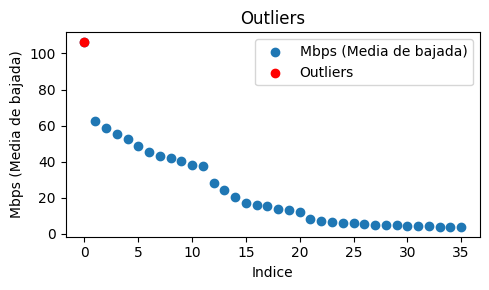

In [647]:
# Calcular quartiles
Q1 = df_07["Mbps (Media de bajada)"].quantile(0.25)
Q3 = df_07["Mbps (Media de bajada)"].quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral
umbral_outliers = 1.5 * IQR

# Marcar outliers en el gráfico de dispersión
outliers = df_07[(df_07["Mbps (Media de bajada)"] < Q1 - umbral_outliers) | (df_07["Mbps (Media de bajada)"] > Q3 + umbral_outliers)]

plt.figure(figsize=(5, 3))
plt.scatter(df_07.index, df_07["Mbps (Media de bajada)"], label='Mbps (Media de bajada)')
plt.scatter(outliers.index, outliers["Mbps (Media de bajada)"], color='red', label='Outliers')

# Etiquetas y título
plt.xlabel('Indice')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Outliers')
plt.legend()

plt.tight_layout()
plt.show()


In [648]:
df_07.describe()

Mbps (Media de bajada)
count               36.000000
mean                24.180833
std                 23.636605
min                  3.620000
25%                  5.335000
50%                 14.605000
75%                 41.092500
max                106.560000

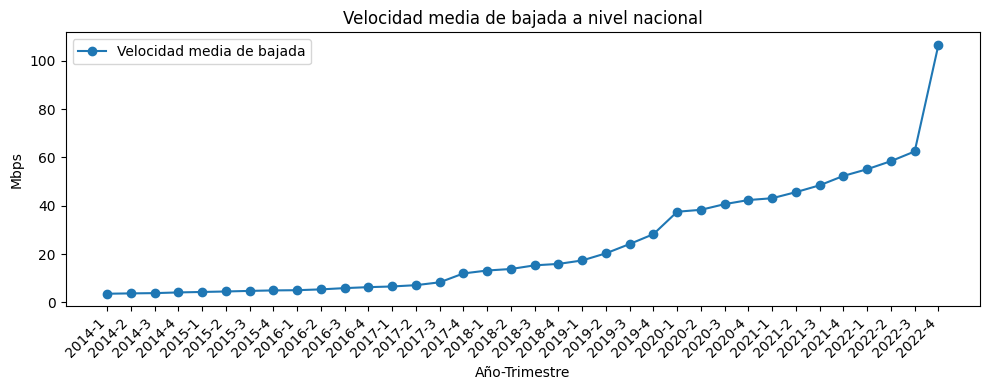

In [649]:
df_07 = df_07.sort_values(by=['Año', 'Trimestre'])
plt.figure(figsize=(10, 4))

plt.plot(df_07['Año'].astype(str) + '-' + df_07['Trimestre'].astype(str), df_07["Mbps (Media de bajada)"], marker='o', linestyle='-', label= "Velocidad media de bajada")

    # Etiquetas y leyenda
plt.xlabel('Año-Trimestre')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Mbps')
plt.title(f'Velocidad media de bajada a nivel nacional')

plt.legend()
plt.tight_layout()
plt.show()

VELOCIDAD MEDIA DE BAJADA DE INTERNET FIJO POR PROVINCIA

In [650]:
df_08 = pd.read_csv("historico_velocidad_internet_provincias.csv", sep=';', na_values = ['NA', 'N/A', 'NaN', 'Missing'], dtype=str)
df_08 = df_08.dropna(axis=1, how='all')
df_08 = df_08.dropna()
df_08 = df_08.drop_duplicates()
df_08 = df_08.map(strip)
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     864 non-null    object
 1   Trimestre               864 non-null    object
 2   Provincia               864 non-null    object
 3   Mbps (Media de bajada)  864 non-null    object
dtypes: object(4)
memory usage: 27.1+ KB


In [651]:
palabra = r'\bCórdob\b'
df_08['Provincia'] = df_08['Provincia'].str.replace(palabra, 'Córdoba', regex=True)
palabra = r'\bEntre Río\b'
df_08['Provincia'] = df_08['Provincia'].str.replace(palabra, 'Entre Ríos', regex=True)
palabra = r'\bNeuqué\b'
df_08['Provincia'] = df_08['Provincia'].str.replace(palabra, 'Neuquén', regex=True)
palabra = r'\bRío Negr\b'
df_08['Provincia'] = df_08['Provincia'].str.replace(palabra, 'Río Negro', regex=True)
palabra = r'\bTucumá\b'
df_08['Provincia'] = df_08['Provincia'].str.replace(palabra, 'Tucumán', regex=True)

print(len(df_08['Provincia'].unique()))
df_08['Provincia'].unique()


24


array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [652]:
df_08['Mbps (Media de bajada)'] = pd.to_numeric(df_08['Mbps (Media de bajada)'].str.replace(',','.'))
df_08.head()

Año Trimestre        Provincia  Mbps (Media de bajada)
0  2022         4     Buenos Aires                  111.00
1  2022         4  Capital Federal                  182.86
2  2022         4        Catamarca                   83.33
3  2022         4            Chaco                  104.02
4  2022         4           Chubut                   15.92

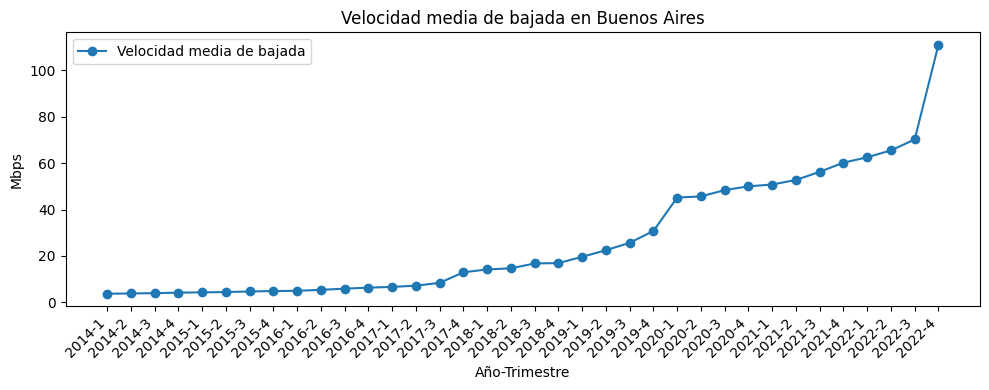

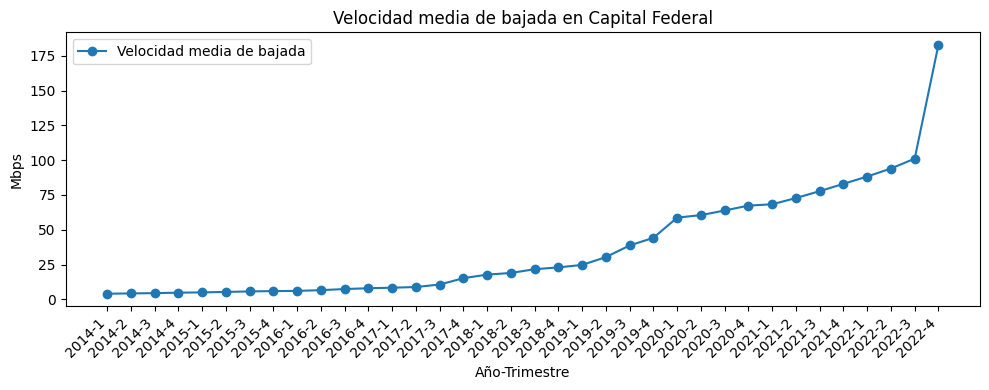

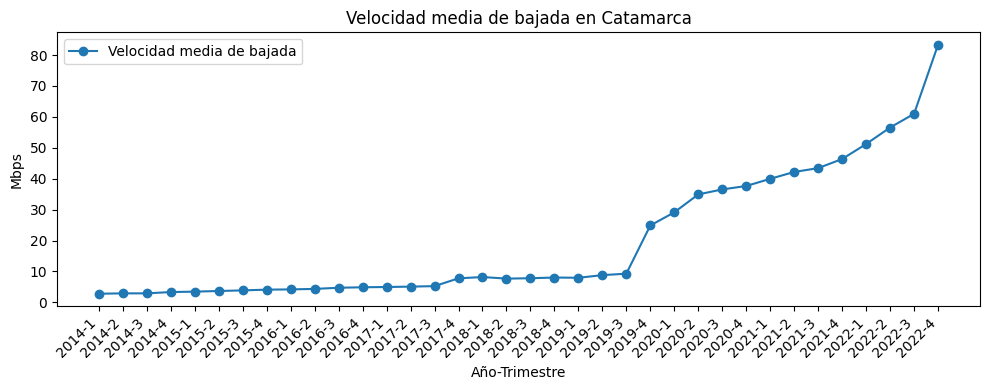

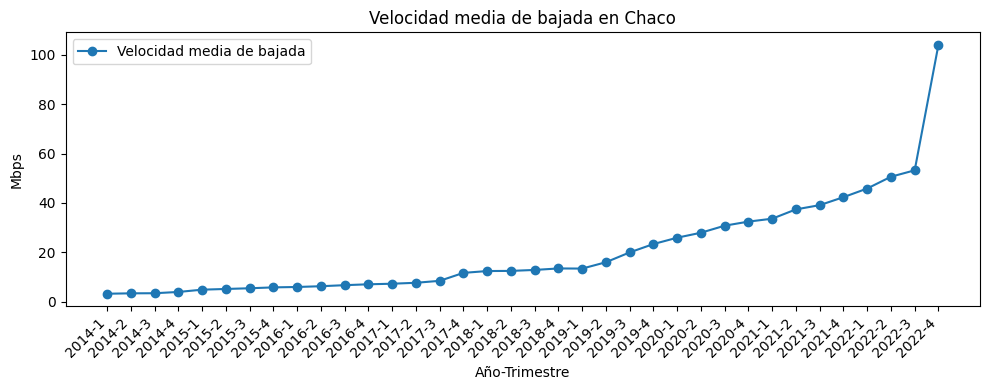

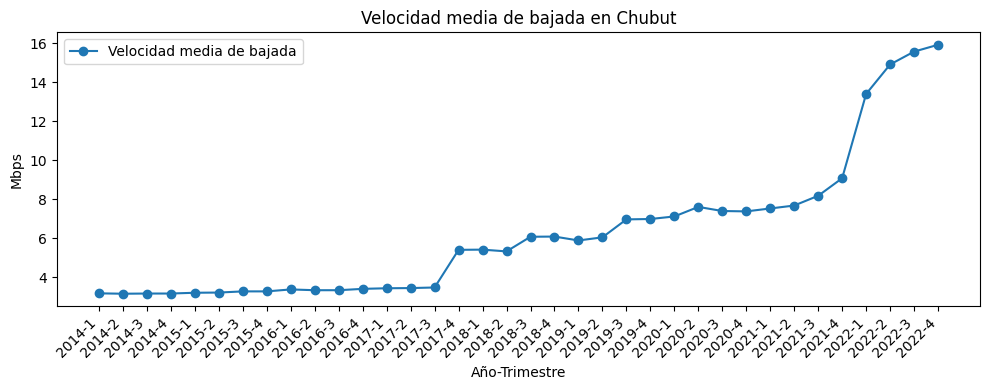

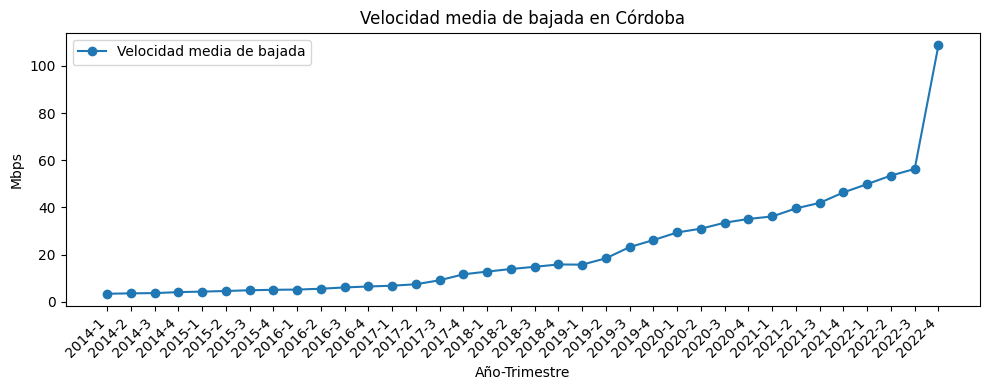

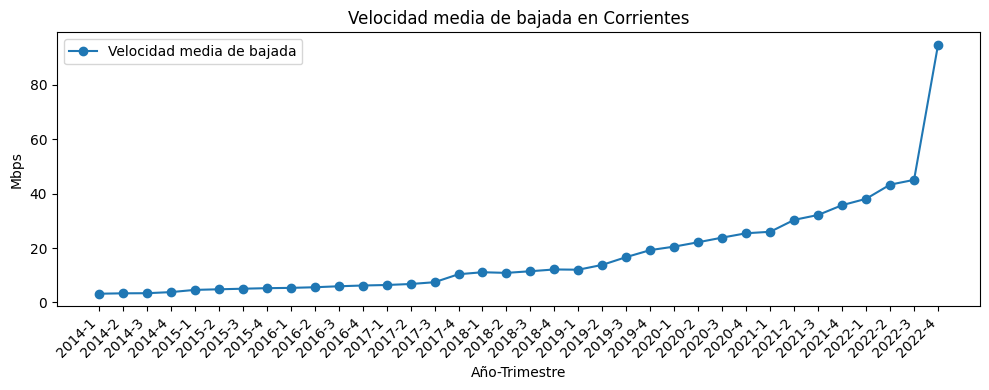

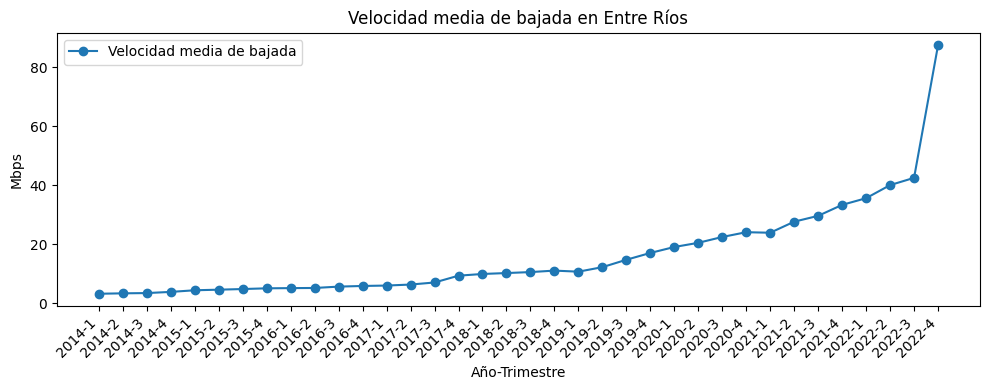

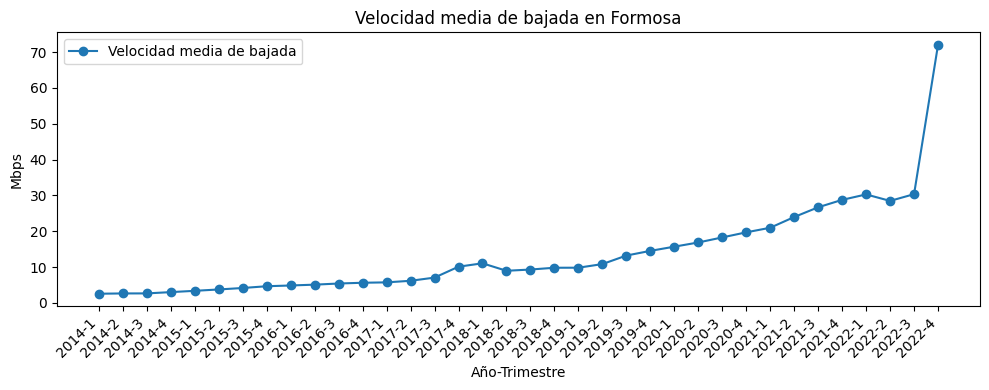

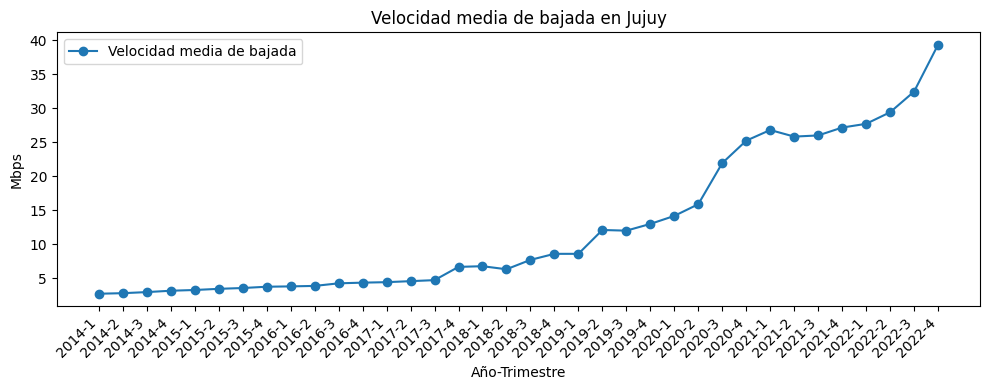

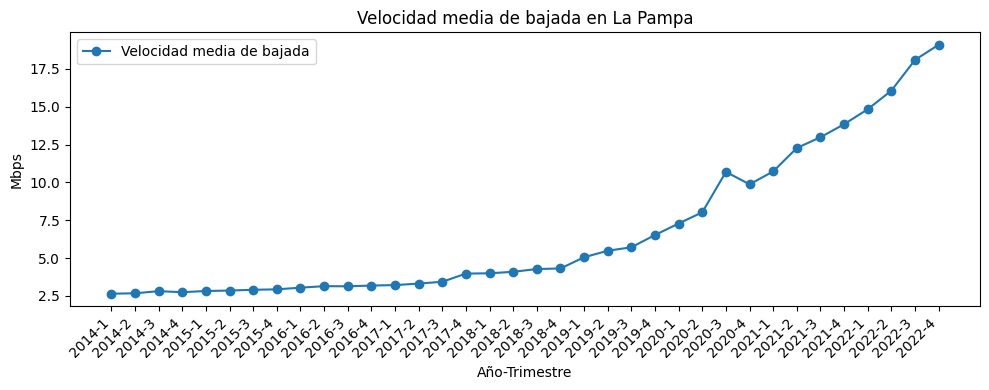

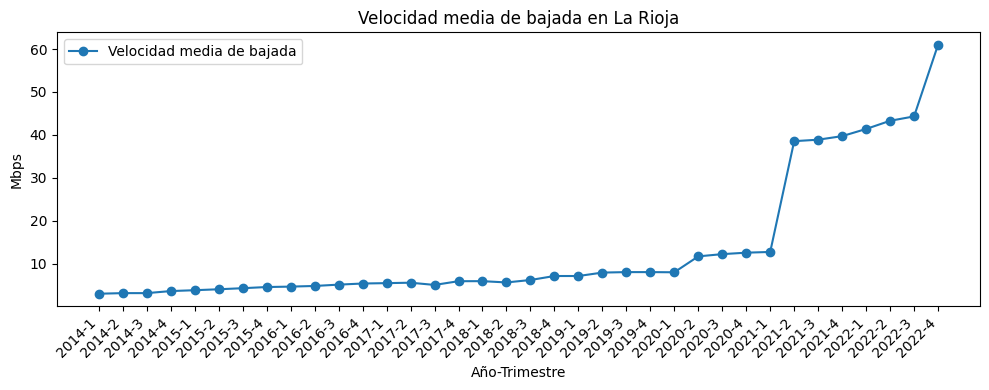

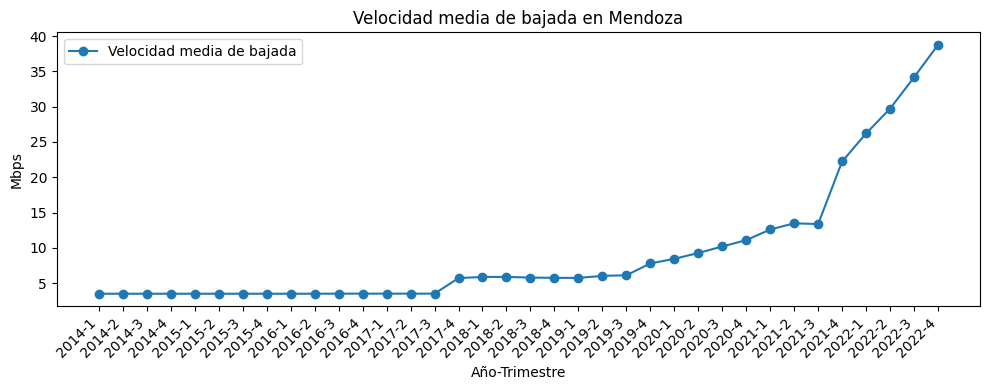

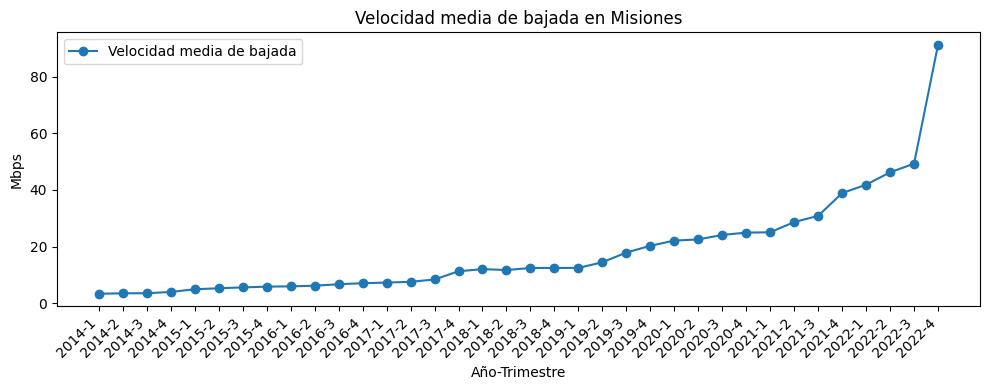

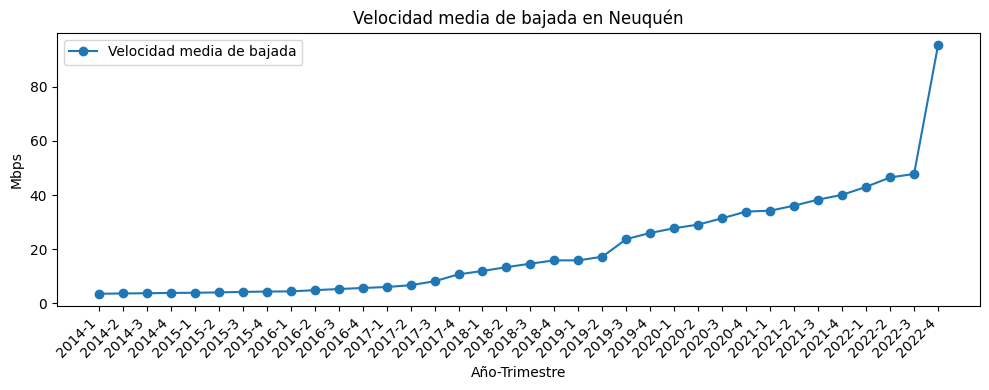

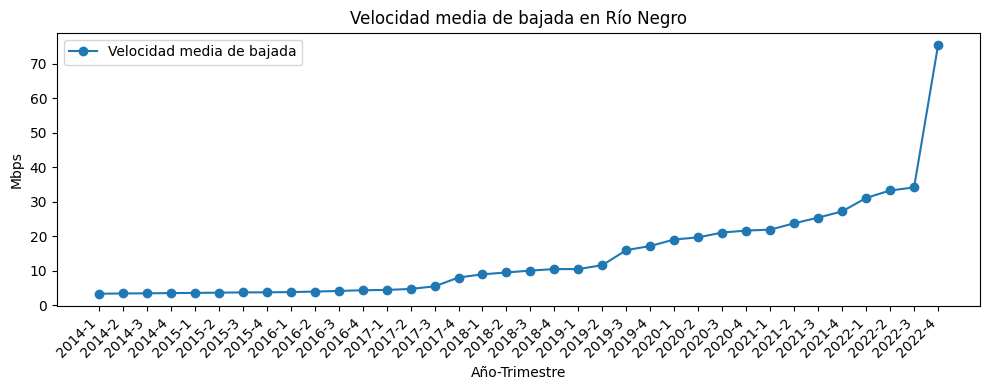

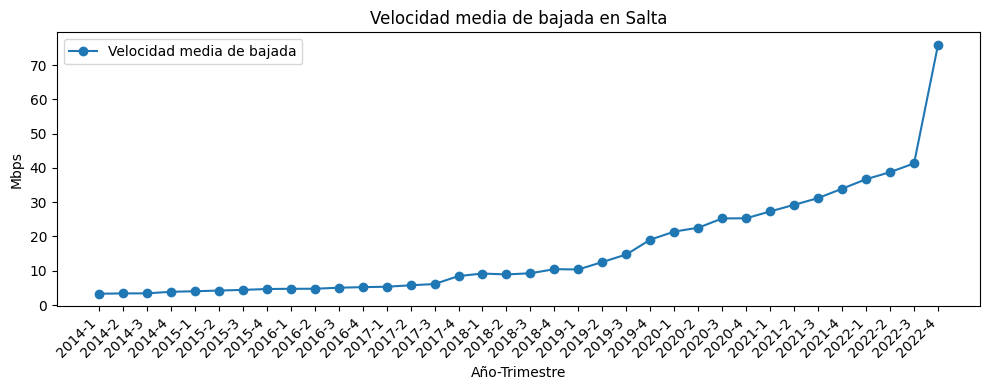

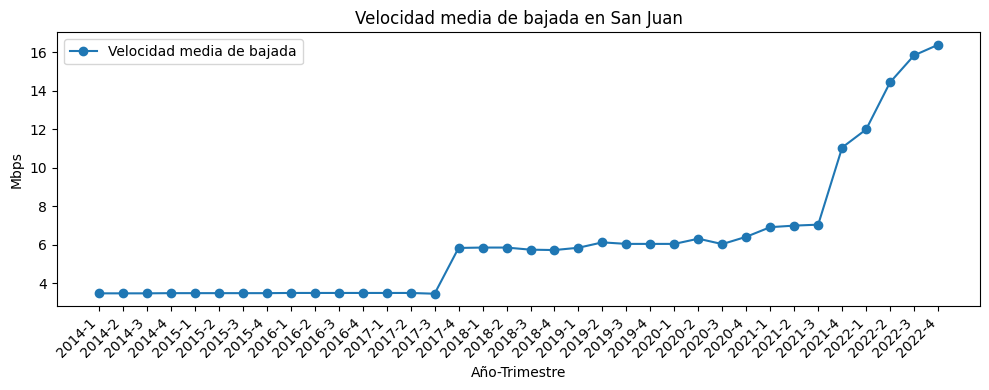

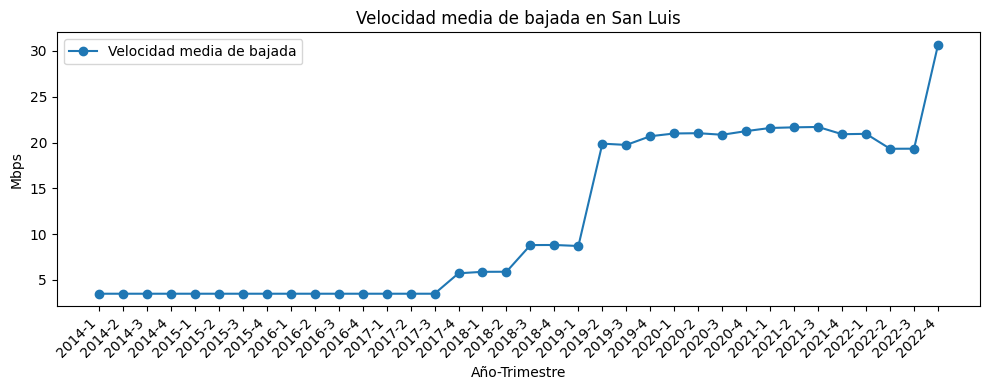

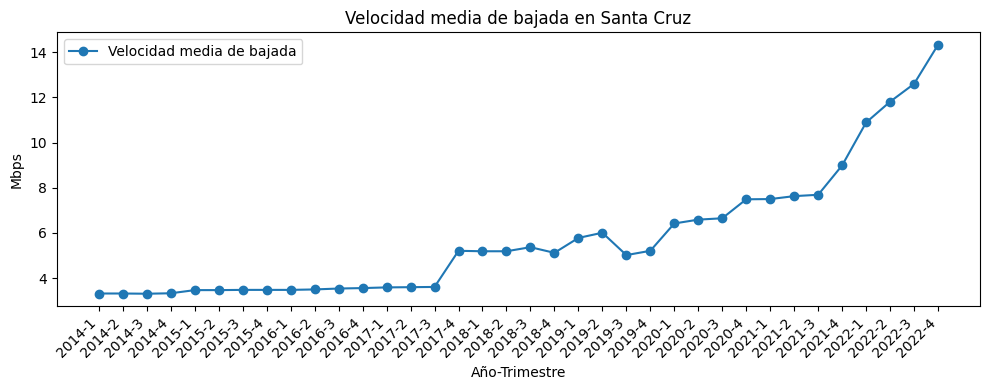

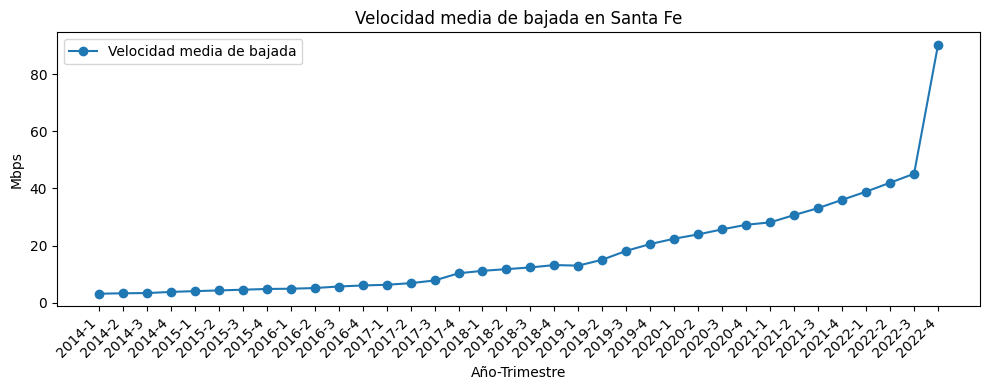

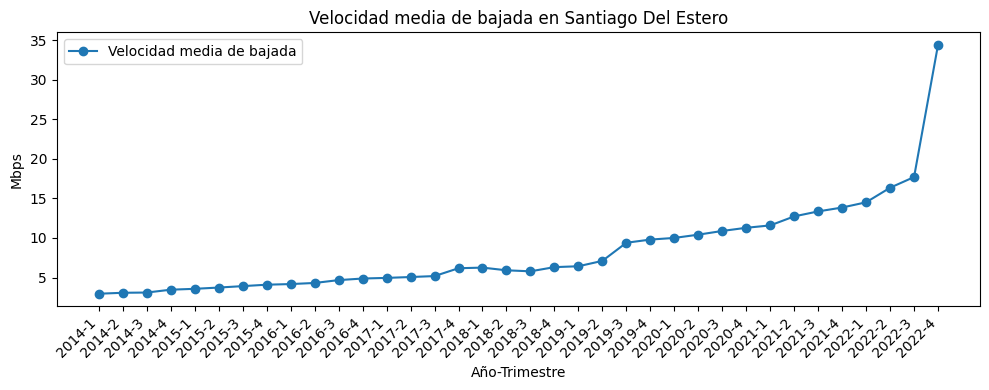

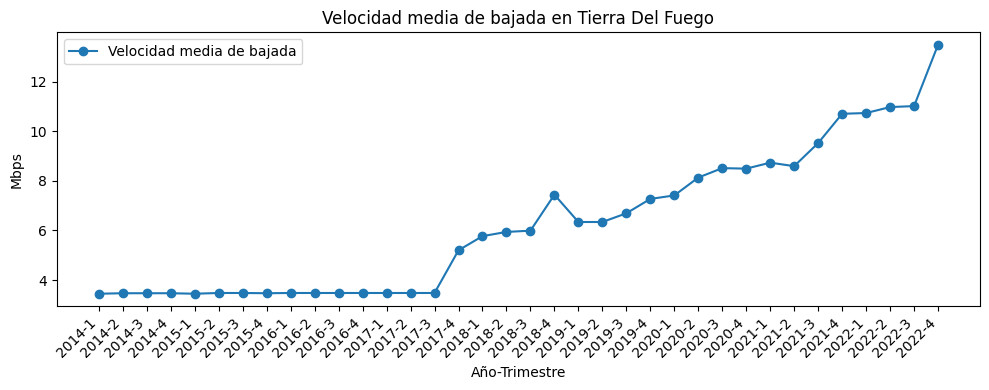

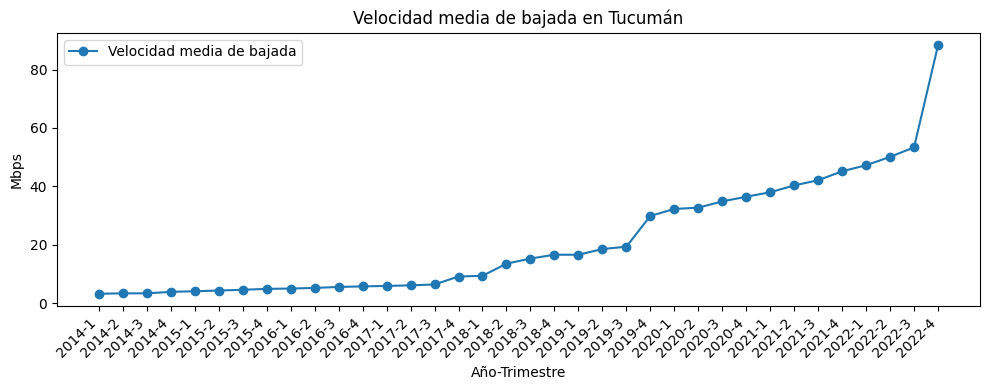

In [653]:
for elemento in df_08['Provincia'].unique():
    df = df_08[df_08['Provincia'] == elemento]
    df = df.sort_values(by=['Año', 'Trimestre'])
    
    plt.figure(figsize=(10, 4))

    plt.plot(df['Año'].astype(str) + '-' + df['Trimestre'].astype(str), df["Mbps (Media de bajada)"], marker='o', linestyle='-', label= "Velocidad media de bajada")
   
    # Etiquetas y leyenda
    plt.xlabel('Año-Trimestre')
    plt.xticks(rotation=45, ha="right")
    plt.ylabel('Mbps')
    plt.title(f'Velocidad media de bajada en {elemento}')

    plt.legend()
    plt.tight_layout()
    plt.show()


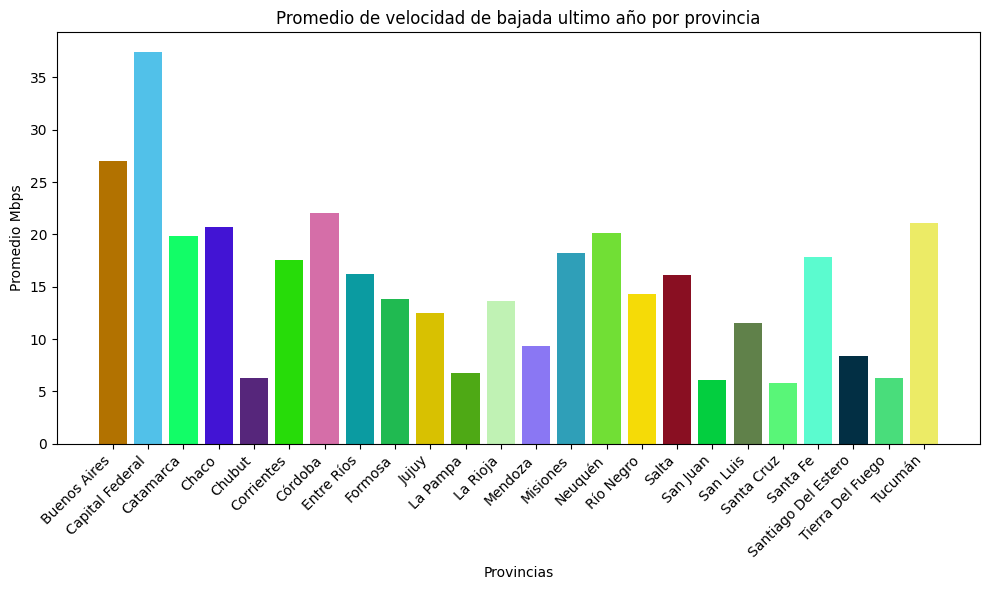

In [654]:
promedio_ultimo_año_provincia = df_08[df_08['Año'] == df_08['Año'].max()]
promedio_ultimo_año_provincia = df_08.groupby('Provincia')["Mbps (Media de bajada)"].mean().reset_index()

plt.figure(figsize=(10, 6))
colores = []
for _ in range(len(promedio['Provincia'])):
    color = (random.random(), random.random(), random.random())
    colores.append(color)
plt.bar(promedio_ultimo_año_provincia['Provincia'], promedio_ultimo_año_provincia['Mbps (Media de bajada)'], color=colores)

plt.xlabel('Provincias')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Promedio Mbps')
plt.title('Promedio de velocidad de bajada ultimo año por provincia')

plt.tight_layout()
plt.show()


DISTRIBUCION DE LOS ACCESOS TOTALES NACIONALES A INTERNET FIJO POR VELOCIDAD

In [655]:
df_09 = pd.read_csv("Internet_Accesos-por-velocidad.csv", sep=';', na_values = ['NA', 'N/A', 'NaN', 'Missing'], dtype=str)
df_09 = df_09.dropna(axis=1, how='all')
df_09 = df_09.dropna()
df_09 = df_09.drop_duplicates()
df_09 = df_09.map(strip)
df_09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Año                      36 non-null     object
 1   Trimestre                36 non-null     object
 2   Hasta 512 kbps           36 non-null     object
 3   Entre 512 Kbps y 1 Mbps  36 non-null     object
 4   Entre 1 Mbps y 6 Mbps    36 non-null     object
 5   Entre 6 Mbps y 10 Mbps   36 non-null     object
 6   Entre 10 Mbps y 20 Mbps  36 non-null     object
 7   Entre 20 Mbps y 30 Mbps  36 non-null     object
 8   Más de 30 Mbp            36 non-null     object
 9   OTROS                    36 non-null     object
 10  Total                    36 non-null     object
dtypes: object(11)
memory usage: 3.2+ KB


In [656]:


df_09['Hasta 512 kbps'] = pd.to_numeric(df_09['Hasta 512 kbps'].str.replace('.',''))

df_09['Entre 512 Kbps y 1 Mbps'] = pd.to_numeric(df_09['Entre 512 Kbps y 1 Mbps'].str.replace('.',''))
df_09['Entre 1 Mbps y 6 Mbps'] = pd.to_numeric(df_09['Entre 1 Mbps y 6 Mbps'].str.replace('.',''))
df_09['Entre 6 Mbps y 10 Mbps'] = pd.to_numeric(df_09['Entre 6 Mbps y 10 Mbps'].str.replace('.',''))
df_09['Entre 10 Mbps y 20 Mbps'] = pd.to_numeric(df_09['Entre 10 Mbps y 20 Mbps'].str.replace('.',''))
df_09['Entre 20 Mbps y 30 Mbps'] = pd.to_numeric(df_09['Entre 20 Mbps y 30 Mbps'].str.replace('.',''))
df_09['Más de 30 Mbp'] = pd.to_numeric(df_09['Más de 30 Mbp'].str.replace('.',''))

df_09['OTROS'] = pd.to_numeric(df_09['OTROS'].str.replace('.',''))
df_09['Total'] = pd.to_numeric(df_09['Total'].str.replace('.',''))


df_09.head()

Año Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  2022         4           31981                    85668   
1  2022         3           33013                    96727   
2  2022         2           33667                    99498   
3  2022         1           34890                   104840   
4  2021         4           41262                    28521   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                1075272                 1109421                   765015   
1                1161370                 1151906                   823505   
2                1193090                 1197030                   856562   
3                1263273                 1209148                   967508   
4                1413208                 1245333                   976539   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbp   OTROS     Total  
0                   335573        7410902  394282  11208114  
1                   479822        6995750  349035  11091128  
2                   485321        6741922  351594  10958684  
3                   509830        6336187  198333  10624009  
4                   558358        6032322  194251  10489794

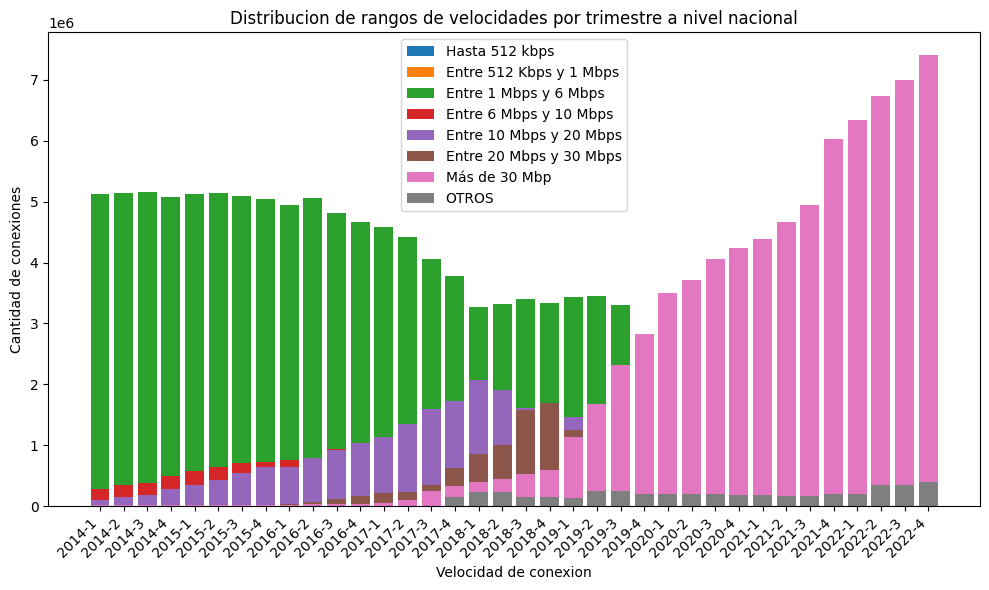

In [657]:
df_09 = df_09.sort_values(by=['Año', 'Trimestre'])

plt.figure(figsize=(10, 6))

for elemento in df_09.columns:
    if elemento != 'Año' and elemento != 'Trimestre' and elemento != 'Total':
        plt.bar(df_09['Año'].astype(str) + '-' + df_09['Trimestre'].astype(str), df_09[elemento], label=f'{elemento}')
        

plt.xlabel('Velocidad de conexion')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Cantidad de conexiones')
plt.title('Distribucion de rangos de velocidades por trimestre a nivel nacional')

plt.legend()
plt.tight_layout()
plt.show()

ACCESO A INTERNET FIJO POR RANGOS DE VELOCIDAD DE BAJADA Y PROVINCIA

In [658]:
df_10 = pd.read_csv("Internet_Accesos-por-velocidad_provincias.csv", sep=';', na_values = ['NA', 'N/A', 'NaN', 'Missing'], dtype=str)
df_10 = df_10.dropna(axis=1, how='all')
df_10 = df_10.dropna()
df_10 = df_10.drop_duplicates()
df_10 = df_10.map(strip)
df_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  858 non-null    object
 1   Trimestre            858 non-null    object
 2   Provincia            858 non-null    object
 3   HASTA 512 kbps       858 non-null    object
 4   + 512 Kbps - 1 Mbps  858 non-null    object
 5   + 1 Mbps - 6 Mbps    858 non-null    object
 6   + 6 Mbps - 10 Mbps   858 non-null    object
 7   + 10 Mbps - 20 Mbps  858 non-null    object
 8   + 20 Mbps - 30 Mbps  858 non-null    object
 9   + 30 Mbps            858 non-null    object
 10  OTROS                858 non-null    object
 11  Total                858 non-null    object
dtypes: object(12)
memory usage: 87.1+ KB


In [659]:
df_10['HASTA 512 kbps'] = pd.to_numeric(df_10['HASTA 512 kbps'].str.replace('.',''))
df_10['+ 512 Kbps - 1 Mbps'] = pd.to_numeric(df_10['+ 512 Kbps - 1 Mbps'].str.replace('.',''))
df_10['+ 1 Mbps - 6 Mbps'] = pd.to_numeric(df_10['+ 1 Mbps - 6 Mbps'].str.replace('.',''))
df_10['+ 6 Mbps - 10 Mbps'] = pd.to_numeric(df_10['+ 6 Mbps - 10 Mbps'].str.replace('.',''))
df_10['+ 10 Mbps - 20 Mbps'] = pd.to_numeric(df_10['+ 10 Mbps - 20 Mbps'].str.replace('.',''))
df_10['+ 20 Mbps - 30 Mbps'] = pd.to_numeric(df_10['+ 20 Mbps - 30 Mbps'].str.replace('.',''))
df_10['+ 30 Mbps'] = pd.to_numeric(df_10['+ 30 Mbps'].str.replace('.',''))
df_10['OTROS'] = pd.to_numeric(df_10['OTROS'].str.replace('.',''))
df_10['Total'] = pd.to_numeric(df_10['Total'].str.replace('.',''))

df_10.head()

Año Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2022         4     Buenos Aires           28934                23347   
1  2022         4  Capital Federal             516                 5096   
2  2022         4        Catamarca              71                  315   
3  2022         4            Chaco             461                  771   
4  2022         4           Chubut             109                 1614   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0             259866              281550               244555   
1              31320               64653                36336   
2               2716                5028                 4638   
3              16067               17846                 6704   
4              46457               31007                34728   

   + 20 Mbps - 30 Mbps  + 30 Mbps   OTROS    Total  
0                98670    3760109   97634  4794665  
1                 8116    1299117  106772  1551926  
2                 3122      52739    2280    70909  
3                 3039      94866    3909   143663  
4                15770      19048   20026   168759

In [660]:
palabra = r'\bCórdob\b'
df_10['Provincia'] = df_10['Provincia'].str.replace(palabra, 'Córdoba', regex=True)
palabra = r'\bEntre Río\b'
df_10['Provincia'] = df_10['Provincia'].str.replace(palabra, 'Entre Ríos', regex=True)
palabra = r'\bNeuqué\b'
df_10['Provincia'] = df_10['Provincia'].str.replace(palabra, 'Neuquén', regex=True)
palabra = r'\bRío Negr\b'
df_10['Provincia'] = df_10['Provincia'].str.replace(palabra, 'Río Negro', regex=True)
palabra = r'\bTucumá\b'
df_10['Provincia'] = df_10['Provincia'].str.replace(palabra, 'Tucumán', regex=True)

print(len(df_10['Provincia'].unique()))
df_10['Provincia'].unique()


24


array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

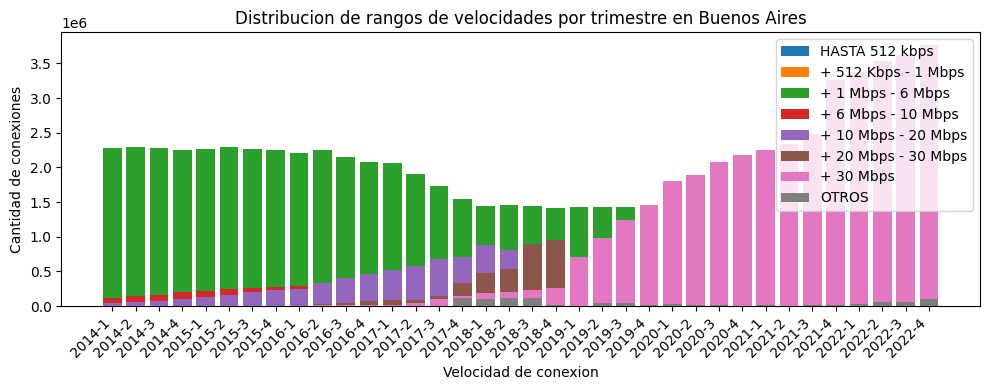

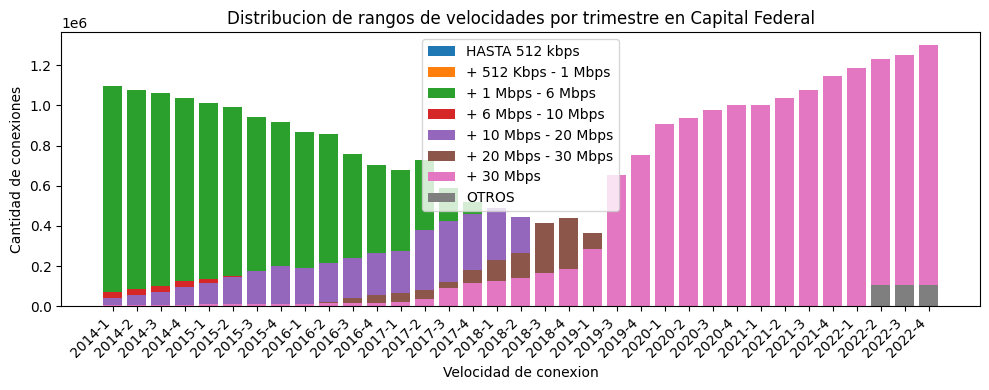

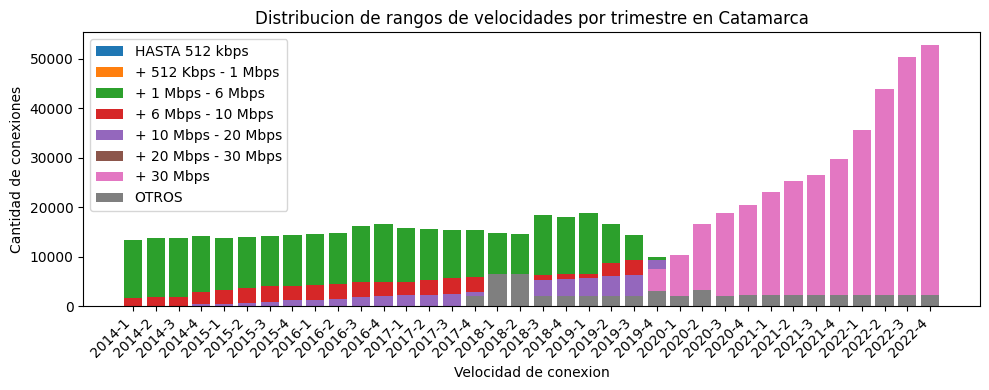

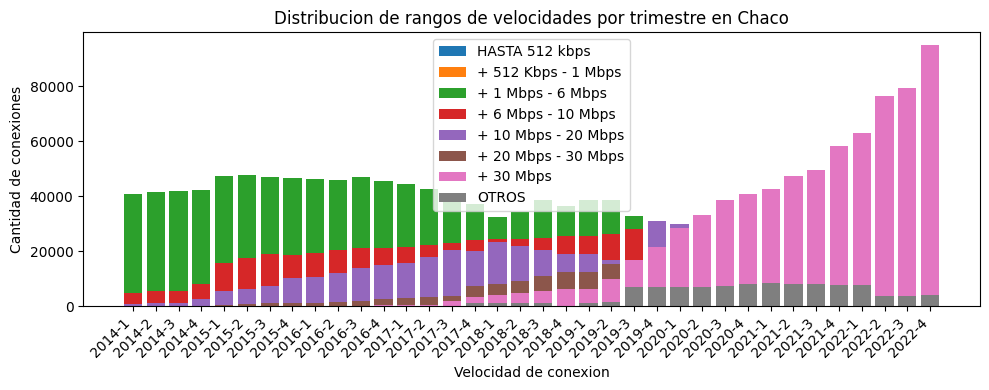

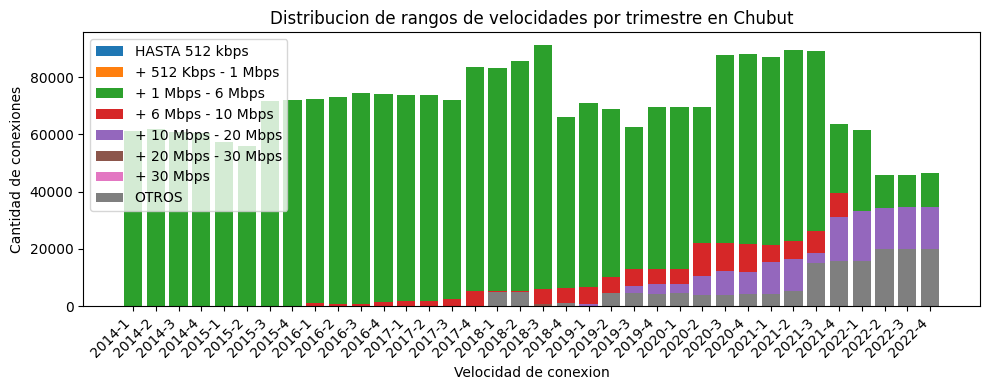

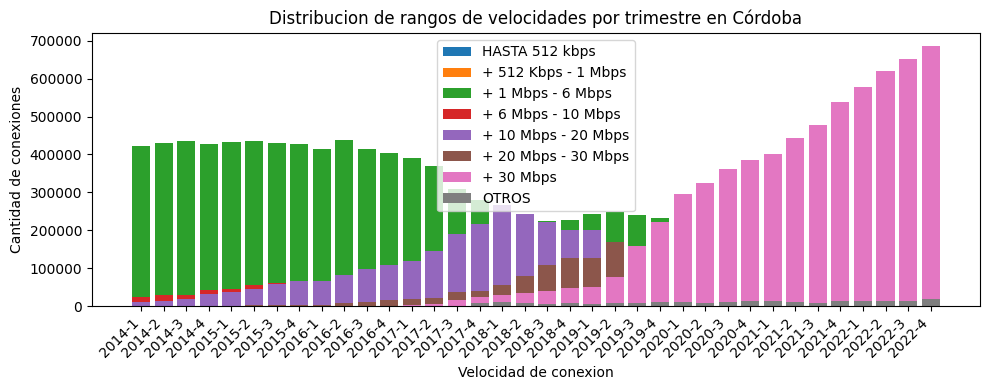

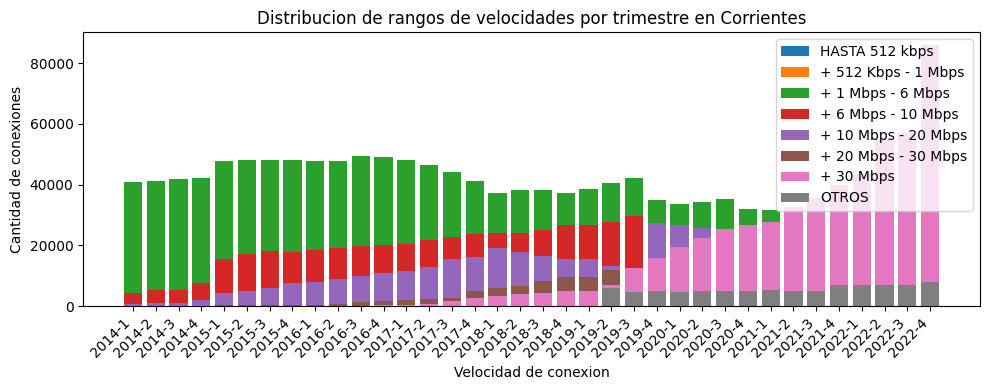

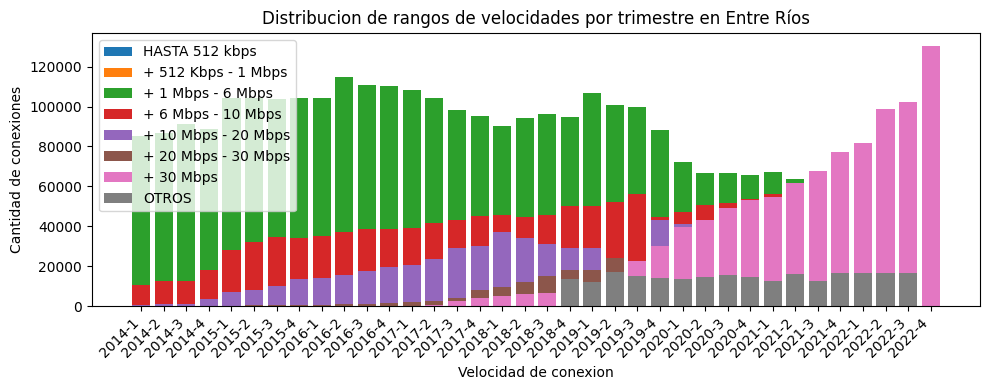

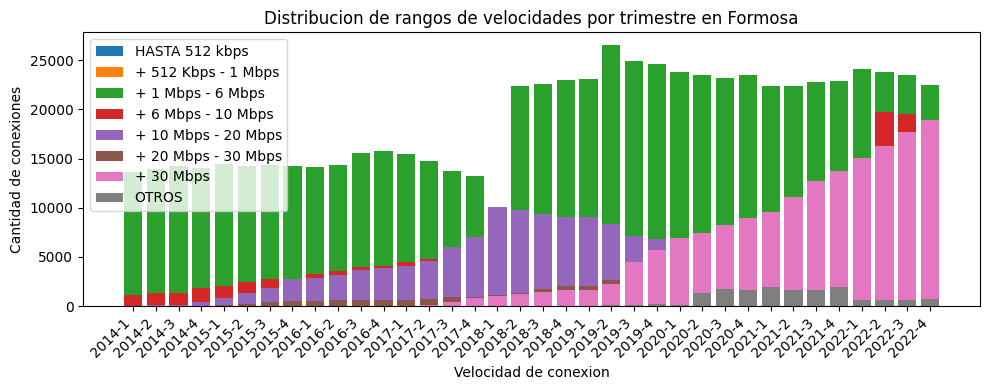

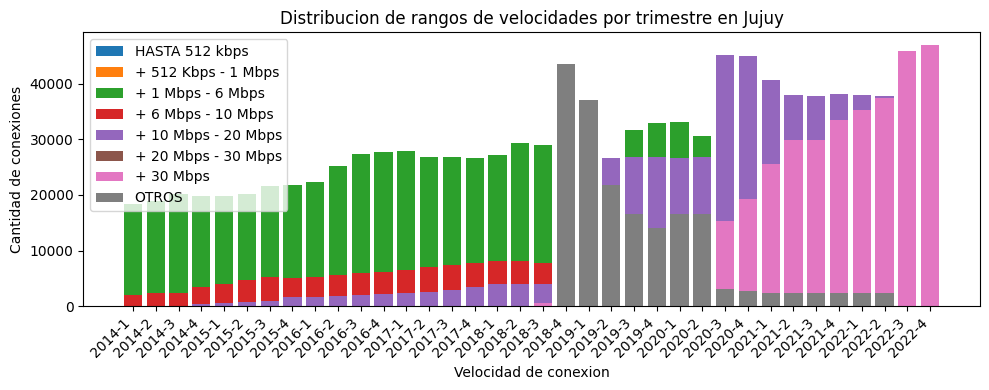

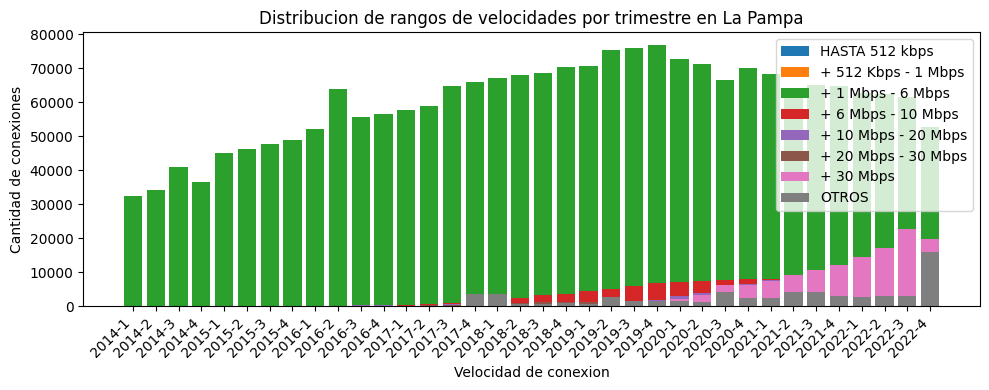

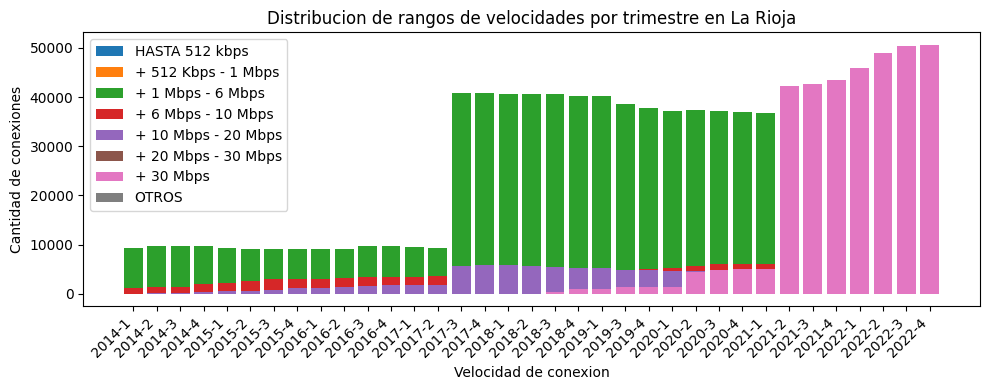

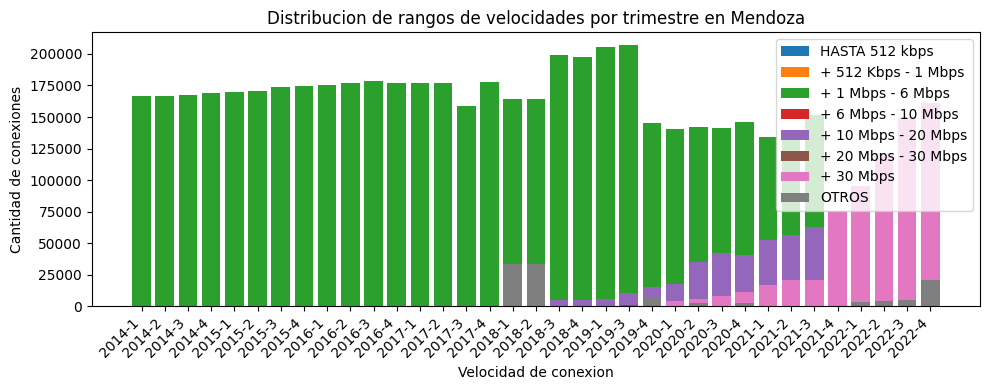

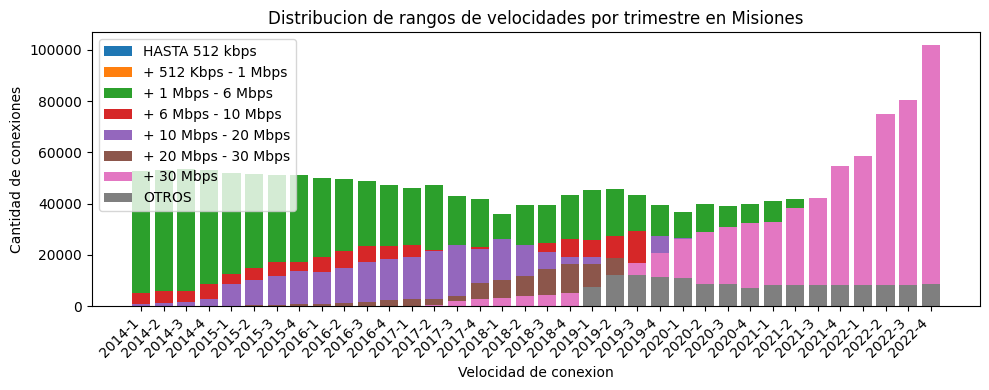

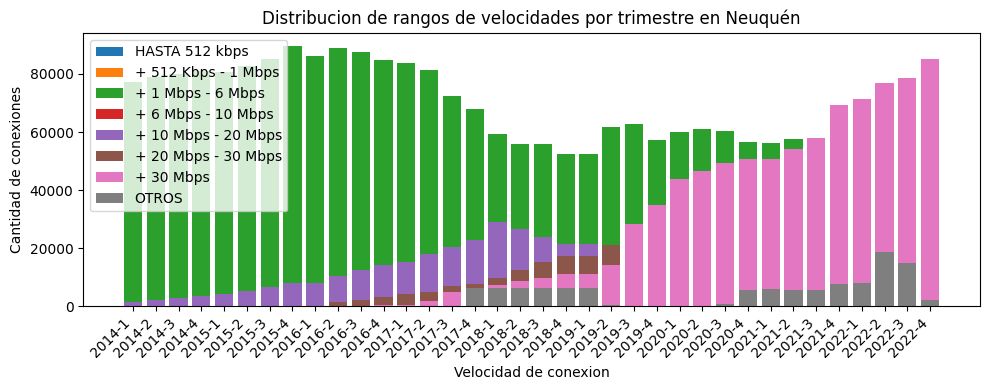

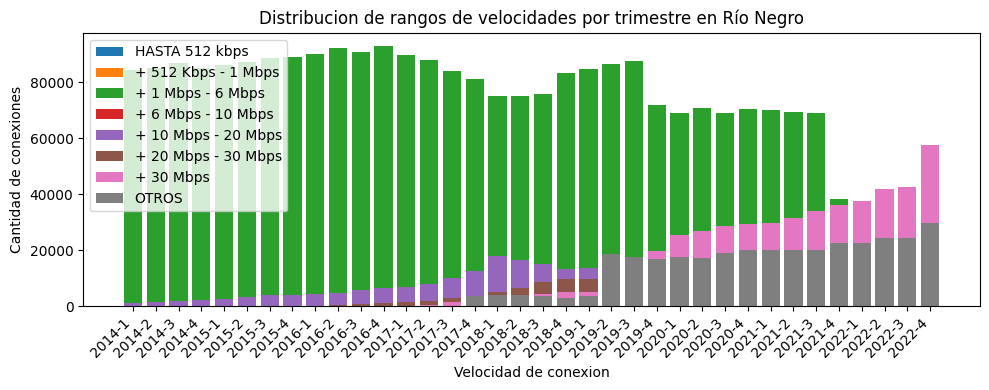

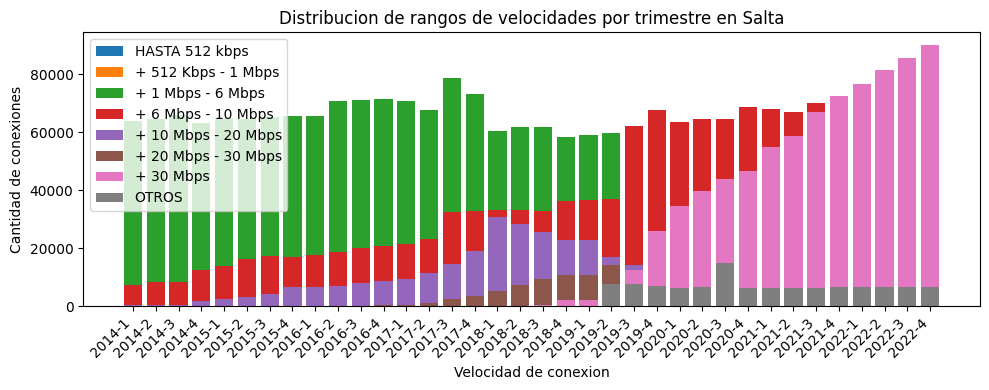

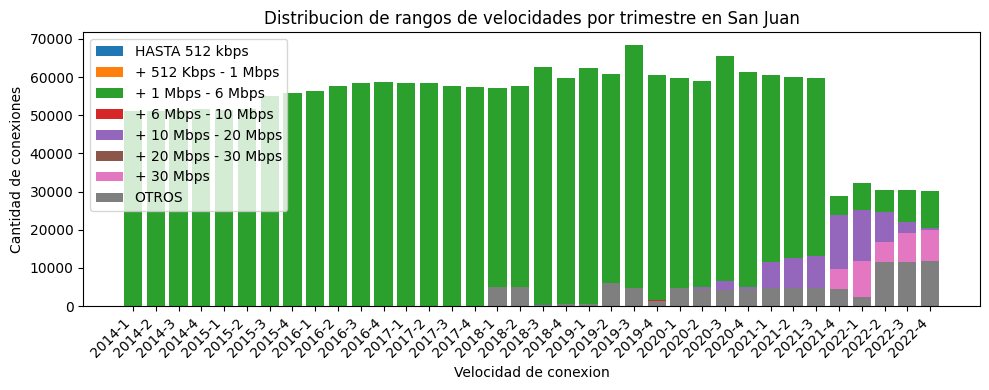

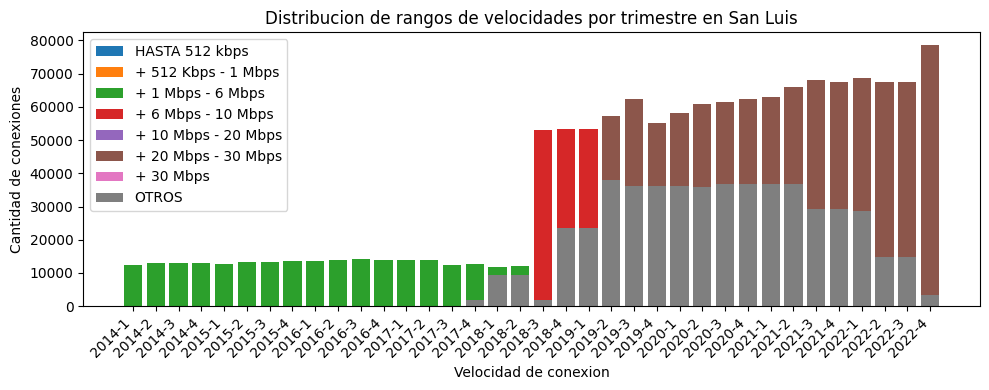

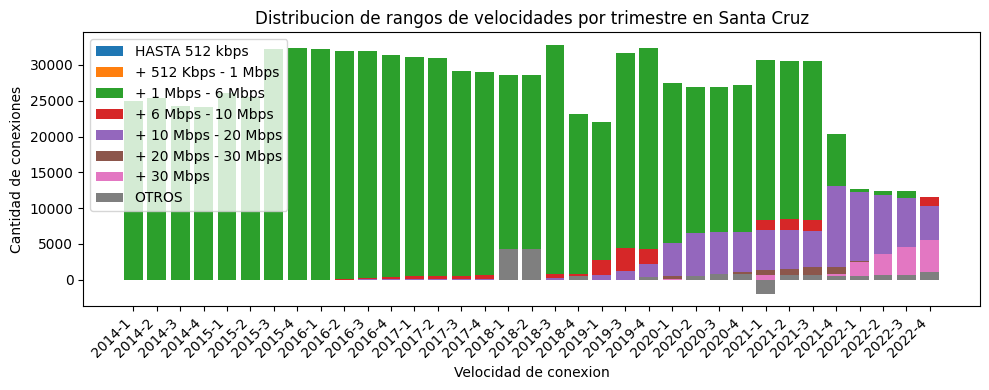

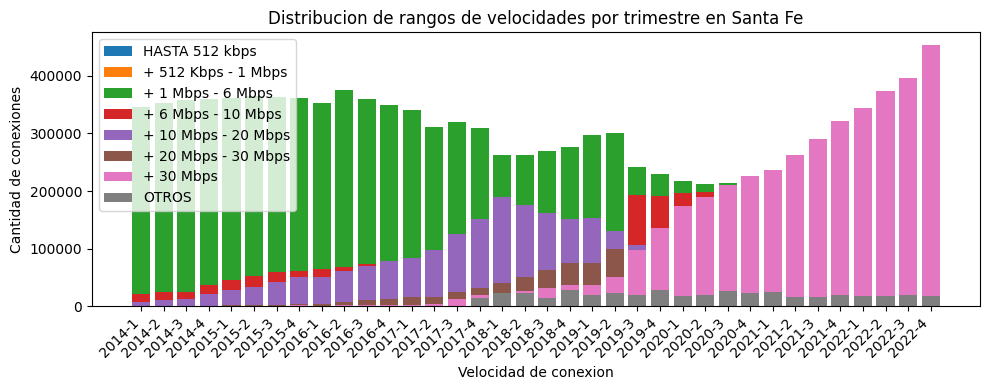

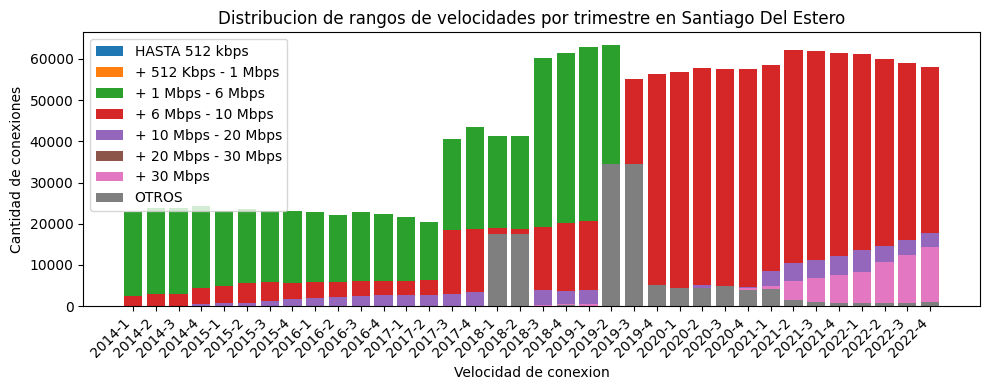

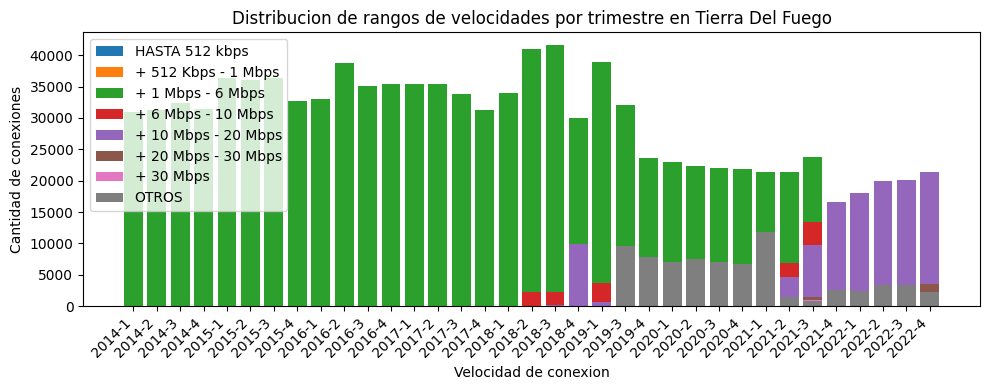

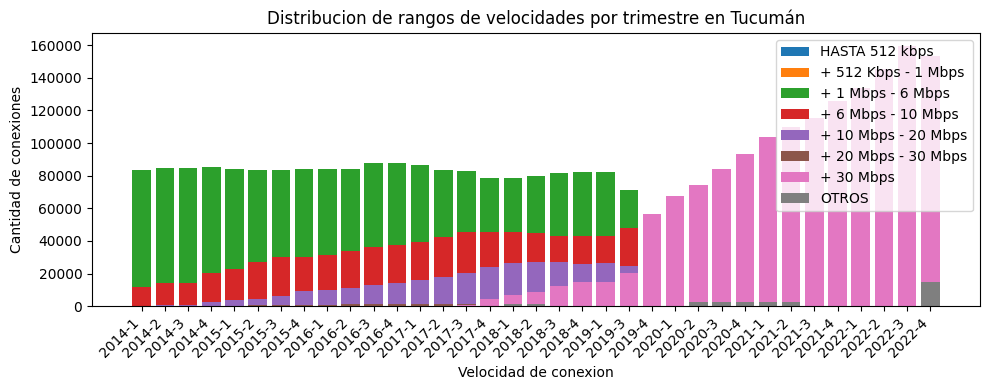

In [661]:
df_10 = df_10.sort_values(by=['Año', 'Trimestre'])

for provincia in df_10['Provincia'].unique():
    df = df_10[df_10['Provincia'] == provincia]
    plt.figure(figsize=(10, 4))

    for elemento in df.columns:
        if elemento != 'Año' and elemento != 'Trimestre' and elemento != 'Provincia' and elemento != 'Total':
            plt.bar(df['Año'].astype(str) + '-' + df['Trimestre'].astype(str), df[elemento], label=f'{elemento}')
        

    plt.xlabel('Velocidad de conexion')
    plt.xticks(rotation=45, ha="right")
    plt.ylabel('Cantidad de conexiones')
    plt.title(f'Distribucion de rangos de velocidades por trimestre en {provincia}')

    plt.legend()
    plt.tight_layout()
    plt.show()

ACCESOS A INTERNET FIJO POR VELOCIDAD DE BAJADA Y PROVINCIA

In [663]:
df_11 = pd.read_csv("Internet_Accesos-por-velocidad_provincia_sin rangos.csv", sep=';', na_values = ['NA', 'N/A', 'NaN', 'Missing'], dtype=str)
df_11 = df_11.dropna(axis=1, how='all')
df_11 = df_11.dropna()
df_11 = df_11.drop_duplicates()
df_11 = df_11.map(strip)
df_11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 503
Columns: 186 entries, Año to 10000 Mbps
dtypes: object(186)
memory usage: 736.3+ KB


In [664]:
df_11.head()

Año Trimestre        Provincia   Otros  0,256 Mbps  0,375 Mbps   \
0  2022         4     Buenos Aires   97.634         18            -   
1  2022         4  Capital Federal  106.772         31            -   
2  2022         4        Catamarca    2.280          -            -   
3  2022         4            Chaco    3.909          -          225   
4  2022         4           Chubut   20.026          8            -   

  0,625 Mbps 0,5 Mbps 0,512 Mbps 0,75 Mbps  ... 2048 Mbps 2529 Mbps 3072 Mbps  \
0          -   28.724        192     4.611  ...         -         -         -   
1          -      451         34     1.307  ...         -         -         -   
2          -       34         37         -  ...         -         -         -   
3        111      234          2         -  ...         -         -         -   
4          -       69         32       836  ...         -         -         -   

  4000 Mbps 5000 Mbps 5125 Mbps 6000 Mbps 7000 Mbps 8000 Mbps 10000 Mbps  
0         -         -         -         -         -         -          -  
1         -         -         -         -         -         -          -  
2         -         -         -         -         -         -          -  
3         -         -         -         -         -         -          -  
4         -         -         -         -         -         -          -  

[5 rows x 186 columns]

INGRESOS TRIMESTRALES POR LA PRESTACION DEL SERVICIO DE INTERNET FIJO

In [76]:
df_12 = pd.read_csv("Internet_Ingresos.csv")
df_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        36 non-null     int64 
 1   Trimestre                  36 non-null     int64 
 2   Ingresos (miles de pesos)  36 non-null     int64 
 3   Periodo                    36 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


ACCESO A INTERNET FIJO POR VELOCIDAD DE BAJADA Y LOCALIDAD

In [77]:
df_13 = pd.read_csv("AccesosaInternetfijoporvelocidaddebajadaylocalidad.csv")
df_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3095 non-null   object 
 1   Partido     3095 non-null   object 
 2   Localidad   3095 non-null   object 
 3   Link Indec  3095 non-null   object 
 4   Otros       962 non-null    float64
 5   0,256 Mbps  28 non-null     float64
 6   0,375 Mbps  1 non-null      float64
 7   0,5 Mbps    643 non-null    float64
 8   0,512 Mbps  523 non-null    float64
 9   0,625 Mbps  1 non-null      float64
 10  0,75 Mbps   284 non-null    float64
 11  1 Mbps      891 non-null    float64
 12  1,25 Mbps   1 non-null      float64
 13  1,5 Mbps    15 non-null     float64
 14  2 Mbps      722 non-null    float64
 15  2,2 Mbps    1 non-null      float64
 16  2,5 Mbps    4 non-null      float64
 17  3 Mbps      1351 non-null   float64
 18  3,3 Mbps    1 non-null      float64
 19  3,5 Mbps    373 non-null   

ACCESOS A INTERNET FIJO POR TECNOLOGIA Y LOCALIDAD

In [78]:
df_14 = pd.read_csv("AccesosaInternetfijoportecnologiaylocalidad.csv")
df_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3137 non-null   object 
 1   Partido        3137 non-null   object 
 2   Localidad      3137 non-null   object 
 3   Link Indec     3137 non-null   object 
 4   ADSL           3137 non-null   object 
 5   CABLEMODEM     3137 non-null   object 
 6   DIAL UP        3137 non-null   object 
 7   FIBRA OPTICA   3137 non-null   object 
 8   OTROS          3137 non-null   object 
 9   SATELITAL      3137 non-null   object 
 10  WIMAX          3137 non-null   object 
 11  WIRELESS       3137 non-null   object 
 12  Total general  3137 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.2+ KB


LISTADO DE LOCALIDADES CON CONECTIVIDAD A INTERNET

In [23]:
df_15 = pd.read_csv("Listadodelocalidadesconconectividadainternet.csv")
df_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provincia       4311 non-null   object
 1   Partido         4311 non-null   object
 2   Localidad       4311 non-null   object
 3   ADSL            4311 non-null   object
 4   Cablemódem      4311 non-null   object
 5   Dial Up         4311 non-null   object
 6   Fibra óptica    4311 non-null   object
 7   4G              4311 non-null   object
 8   3G              4311 non-null   object
 9   Telefonía Fija  4311 non-null   object
 10  Wireless        4311 non-null   object
 11  Satelital       4311 non-null   object
dtypes: object(12)
memory usage: 404.3+ KB
